<a href="https://colab.research.google.com/github/davidklhui/stochastic-modelling/blob/main/Discussion_of_basic_5x3_slot_design.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

author: David K.L. Hui

This project will discuss further design of simple slot game mechamism including 5x3 slot game, horizontal paylines, ways, with the aid of simulations

# Section 1: Introduction

## 1.1: Background

Following the previous project **Discussion of basic 3x3 slot design**, This project will discuss about further common design in casino, archade, and iGaming producer.

In many common design, we can summarize into the following categories:
1. Window size: like 3x3, 5x3, or further dimension
2. Winning pattern/combination: like horizontal paylines; diagonal paylines; ways (i.e. a specific pattern regardless of the physical line)
3. special features, like free spin, x2/x3 payouts, jackpot like prize


This project will generalize the previous programming code to satisfy a more popular design: 5x3 slot game. We will define 2 more paylines than that of our 3x3 slot ga


## 1.2 Objective

Define a 5x3 slot game (5 reels and 3 rows), with 6 symbols each reel. We will define 5 paylines: 3 horizontal paylines, and 1 V-shape payline, and 1 inverted-V-shape payline.

We will then perform simulation to find good distribution of symbols get lead to satisfied RTP and Hit Frequency.

Finally, we will derive all true probability of each events, and use these probabilities to re-run all of our simulations.


# Section 2: Programming

Here we will first look at some of the previous code, then generalize to a more general case

## 2.1: Import related libraries

In [ ]:
# import related libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter

import typing


## 2.2: Symbol Class

In [ ]:
# define Symbol class, allow to not supplying probability, default to 0
class Symbol():
  def __init__(self, key, symbol, prob=0):
    if(prob < 0 or prob > 1):
      raise Exception(f"probability must be within [0,1], received {symbol} has prob={prob}")

    self.key = key
    self.symbol = symbol
    self.prob = prob

  def __repr__(self):
    return self.symbol


# Example, but not limited to
cheese = Symbol(0, '🧀')
apple = Symbol(1, '🍎')
lemon = Symbol(2, '🍋')
kiwi = Symbol(3, '🥝')


cheese, apple, lemon, kiwi

(🧀, 🍎, 🍋, 🥝)

## 2.3: Payout (Paylines) Function

In [ ]:

payout_payline_definition = {
    # for all are the same
    # 0 payout is not necessary to put in
    "all": [
        {"key": 1, "payout": 20},
        {"key": 2, "payout": 25},
        {"key": 3, "payout": 30},
        {"key": 4, "payout": 50},
        {"key": 5, "payout": 75},
    ],
    # further combinations
    # will be discuss in later projects
    "extra": [
        # {"keys": [1,2,3,4,5],
        #  "payout": {
        #     "match_order": 200,
        #     "else": 100}
        # }
    ]
}


def payout_single_line(row: typing.List[Symbol], payout_payline_definition):
  if len(row)!=5:
    raise Exception(f"must provide a row of length 5 (because 5 reels), given={len(row)}")
  keys = [symbol.key for symbol in row]

  key_counts = Counter(keys)

  # check if same keys, if so, check the first key
  if(sorted(list(key_counts.values())) == [len(row)]):
    the_key = keys[0]
    for item in payout_payline_definition['all']:
      if item['key'] == the_key:
        return item["payout"]

  # check for further combinations:
  # else:
  #   for item in payout_payline_definition["extra"]:
  #     check_keys = item["keys"]
  #     payout = item["payout"]
  #     if check_keys == keys:
  #       return payout["match_order"]
  #     else:
  #       if(check_keys == sorted(keys)):
  #         return payout["else"]

  # default
  return 0

In [ ]:

ghost = Symbol(0, '👻')
apple = Symbol(1, '🍎')
lemon = Symbol(2, '🍋')
kiwi = Symbol(3, '🥝')
pizza = Symbol(4, '🍕')
cheese = Symbol(5, '🧀')


In [ ]:
# no payout
print(f"no payout: {payout_single_line([apple, apple, lemon, pizza, cheese], payout_payline_definition)}")

# all apple
print(f"all apple, get payout: {payout_single_line([apple, apple, apple, apple, apple], payout_payline_definition)}")

# all lemon
print(f"all lemon, get payout: {payout_single_line([lemon, lemon, lemon, lemon, lemon], payout_payline_definition)}")

# all kiwi
print(f"all kiwi, get payout: {payout_single_line([kiwi, kiwi, kiwi, kiwi, kiwi], payout_payline_definition)}")

# all pizza
print(f"all pizza, get payout: {payout_single_line([pizza, pizza, pizza, pizza, pizza], payout_payline_definition)}")

# all cheese
print(f"all cheese, get payout: {payout_single_line([cheese, cheese, cheese, cheese, cheese], payout_payline_definition)}")

# all ghost
print(f"all ghost, no payout: {payout_single_line([ghost, ghost, ghost, ghost, ghost], payout_payline_definition)}")

# # special pattern
# print(f"special pattern (apple,lemon,kiwi,pizza,cheese), get payout, matched order: {payout_single_line([apple, lemon, kiwi, pizza, cheese], payout_payline_definition)}")

# # special pattern
# print(f"special pattern (lemon,apple,kiwi,pizza,cheese), get payout, not matched order: {payout_single_line([lemon, apple, kiwi, pizza, cheese], payout_payline_definition)}")



no payout: 0
all apple, get payout: 20
all lemon, get payout: 25
all kiwi, get payout: 30
all pizza, get payout: 50
all cheese, get payout: 75
all ghost, no payout: 0
special pattern (apple,lemon,kiwi,pizza,cheese), get payout, matched order: 200
special pattern (lemon,apple,kiwi,pizza,cheese), get payout, not matched order: 100


In [ ]:

# to generalize the payout calculation, now considering the whole window

def payout_paylines(rows: typing.List[typing.List[Symbol]], payout_payline_definition):
  if len(rows)!=3:
    raise Exception(f"must provide 3 rows, each of length 5 (because 5 reels), given rows={len(rows)}")

  horizontal_payline_1 = payout_single_line(rows[0], payout_payline_definition)
  horizontal_payline_2 = payout_single_line(rows[1], payout_payline_definition)
  horizontal_payline_3 = payout_single_line(rows[2], payout_payline_definition)

  v_payline = payout_single_line([rows[0][0], rows[1][1], rows[2][2], rows[1][3], rows[0][4]], payout_payline_definition)
  v_inverted_payline = payout_single_line([rows[2][0], rows[1][1], rows[0][2], rows[1][3], rows[2][4]], payout_payline_definition)

  return horizontal_payline_1 + horizontal_payline_2 + horizontal_payline_3 + v_payline + v_inverted_payline

In [ ]:
print("matched V-inverted, and 3rd row")

payout_paylines([[apple, apple, lemon, lemon, lemon],
                [apple, kiwi, ghost, kiwi, pizza],
                [kiwi, kiwi, lemon, kiwi, lemon]],
              payout_payline_definition)

matched V-inverted, and 3rd row


0

In [ ]:
print("matched 2nd and 3rd rows")

payout_paylines([[apple, apple, lemon, lemon, lemon],
                [apple, apple, apple, apple, apple],
                [kiwi, kiwi, lemon, kiwi, lemon]],
              payout_payline_definition)

matched 2nd and 3rd rows


20

In [ ]:
print("matched all 3 rows")

payout_paylines([[apple, apple, apple, apple, apple],
                [apple, apple, apple, apple, apple],
                [kiwi, kiwi, lemon, kiwi, lemon]],
              payout_payline_definition)

matched all 3 rows


40

In [ ]:
print("matched V")

payout_paylines([[apple, apple, apple, apple, cheese],
                [apple, lemon, apple, pizza, apple],
                [kiwi, kiwi, kiwi, kiwi, lemon]],
              payout_payline_definition)

matched V


200

In [ ]:
print("matched 2 rows, and V")

payout_paylines([[apple, apple, apple, apple, cheese],
                [cheese, lemon, kiwi, pizza, apple],
                [lemon, kiwi, kiwi, lemon, kiwi]],
              payout_payline_definition)

matched 2 rows, and V


300

## 2.5: Reel Class

In [ ]:
# define a reel, which can provide the probability of apple, lemon, and kiwi
# so for the N-reels slot design, we can have different set of probabilities of symbols
# to generalize this, it should directly accept any symbols, but probability must sum up to 1
class Reel():
  def __init__(self, symbols: typing.List[Symbol]):
    self.symbols = symbols

    ## basic checks for the validity of inputs

    key_list = [x.key for x in self.symbols]
    check_keys, keys_count = np.unique(key_list, return_counts=True)
    if not all(keys_count==1):
      raise Exception(f"Key set are not all distinct, given: {key_list}, duplicated items: {[a[0] for a in zip(check_keys, keys_count) if a[1] > 1]}")

    symbol_list = [x.symbol for x in symbols]
    check_symbols, symbols_count = np.unique(symbol_list, return_counts=True)
    if not all(symbols_count==1):
      raise Exception(f"Symbol set are not all distinct, given: {symbol_list}, duplicated: {[a[0] for a in zip(check_symbols, symbols_count) if a[1] > 1]}")

    total_prob = sum([x.prob for x in symbols])
    if total_prob < 0:
      raise Exception(f"Prob isn't sum up to 1: total prob={total_prob}")
    if total_prob > 1:
      if np.abs(total_prob - 1) < 1e-6:
        # simply update any one of the symbol because the diff is extremely small
        any_one_symbol = self.symbols[np.random.choice(a = range(len(symbols)))]
        any_one_symbol.prob = any_one_symbol.prob - np.abs(total_prob - 1)
      else:
        raise Exception(f"Prob isn't sum up to 1: total prob={total_prob}")



  def probs(self):
    return [x.prob for x in self.symbols]

  def spin(self, size):
    return np.random.choice(a=self.symbols, size=size, p=self.probs(), replace=True)




In [ ]:
np.random.choice(a = range(5))

4

## 2.6: Slot Class

In [ ]:
# define the slot game which aceept N reels
# the spin accept size parameter, which is also changable to any reasonabl value like 3 or 5
class SlotPrototype():
  def __init__(self, cost, reels: typing.List[Reel], rows: int):
    self.cost = cost
    self.reels = reels
    self.rows = rows

  def spin(self):
    return np.transpose(np.c_[[self.reels[i].spin(self.rows) for i in range(len(self.reels))]])

  # pre-define the payout function here for later inheritance and implement
  def payout(self):
    pass



In [ ]:

# suppose this Slot1, using payout not just horizontal paylines, but also V-shape and inverted V-shape
# and also ways
class SlotV1(SlotPrototype):

  def __init__(self, cost,
               reels: typing.List[Reel], rows: int,
               payout_payline_definition,
               payout_paylines_fn):
    super().__init__(cost, reels, rows)
    self.payout_payline_definition = payout_payline_definition
    self.payout_paylines_fn = payout_paylines_fn

  def spin(self):
    results = super().spin();
#    print(results)
#    print(self.payout(results))
    return self.payout(results)

  def payout(self, results: typing.List[typing.List[Symbol]]):
    return self.payout_paylines_fn(results, payout_payline_definition)



In [ ]:
# Example


# randomly set the probabilities, they are not important in this stage, but we will adjust them later
reel1 = Reel([Symbol(4, '🧀', 0.1), Symbol(1, '🍎', 0.7), Symbol(2, '🍋', 0.1), Symbol(3, '🥝', 0.1)])
reel2 = Reel([Symbol(4, '🧀', 0.1), Symbol(1, '🍎', 0.3), Symbol(2, '🍋', 0.3), Symbol(3, '🥝', 0.3)])
reel3 = Reel([Symbol(4, '🧀', 0.25), Symbol(1, '🍎', 0.25), Symbol(2, '🍋', 0.25), Symbol(3, '🥝', 0.25)])
reel4 = Reel([Symbol(4, '🧀', 0.55), Symbol(1, '🍎', 0.15), Symbol(2, '🍋', 0.15), Symbol(3, '🥝', 0.15)])
reel5 = Reel([Symbol(4, '🧀', 0.97), Symbol(1, '🍎', 0.01), Symbol(2, '🍋', 0.01), Symbol(3, '🥝', 0.01)])

# for easier checking, set the spin size be larger (say 10), so we should expect there are 10 rows x 5 columns (5 reels)
# for this example, reel 1 should have many apples; reel 5 should have mostly cheeses
slotV1 = SlotV1(cost=10, reels=[reel1, reel2, reel3, reel4, reel5], rows=3,
              payout_payline_definition=payout_payline_definition,
              payout_paylines_fn=payout_paylines)




In [ ]:
slotV1.spin()

10

In [ ]:
slotV1.spin()

14

In [ ]:
slotV1.spin()

10

In [ ]:
slotV1.spin()

5

In [ ]:
slotV1.spin()

10

# Section 3: Simulation

Like previous projects, next we will discuss how to simulate the slot mechanism spin results. Depending on the metrics we used (like Return-To-Play percentage, Hit Frequency percentage, Volatility, or further gambler's behavior), we will try to find a good distribution of symbols per reel.

Again, we assume the payout value are fixed. However, the payout value can be optimized under our discussion in Spin-Poker project

## 3.1: Programming for Simulation

In [ ]:

class SlotV1Sim():

  def __init__(self, sim_size, sim_size_for_probs, cost):
    self.sim_size = sim_size
    self.sim_size_for_probs = sim_size_for_probs
    self.cost = cost
    self.results = [None] * sim_size

    self.sim()

  def sim(self):
    for i in range(self.sim_size):
      if i % 10 == 0:
        print(i)

      ssi = self.SlotSimInternal(self.sim_size_for_probs, self.cost)

      self.results[i] = ssi


  class SlotSimInternal():
    def __init__(self, sim_size_for_probs, cost):
      num_rows = 3
      num_reels = 5
      num_symbols = 6
      dirichlet = np.random.dirichlet(np.ones(num_symbols), size=num_reels)

      reels = [self.construct_reel(item) for item in dirichlet]

      slot = SlotV1(cost=cost,
               reels=reels, rows=num_rows,
               payout_payline_definition=payout_payline_definition,
               payout_paylines_fn=payout_paylines)

      self.sim_size_for_probs = sim_size_for_probs
      self.cost = cost
      self.dirichlet = dirichlet
      self.reels = reels
      self.slot = slot
      self.outcome = None

      self.train()
      self.RTP = self.calculate_RTP()
      self.HF = self.calculate_HF()

    def construct_reel(self, probs):
#      print(probs)
      ghost = Symbol(0, '👻', probs[0])
      apple = Symbol(1, '🍎', probs[1])
      lemon = Symbol(2, '🍋', probs[2])
      kiwi = Symbol(3, '🥝', probs[3])
      pizza = Symbol(4, '🍕', probs[4])
      cheese = Symbol(5, '🧀', probs[5])

      return Reel(symbols=[ghost, apple, lemon, kiwi, pizza, cheese])

    def train(self):
      outcome = [self.slot.spin() for i in range(self.sim_size_for_probs)]
      self.outcome = outcome

    def calculate_RTP(self):
      expected_payout = np.mean(self.outcome)

      self.expected_payout = expected_payout
      self.expected_gain = expected_payout - self.cost
      return expected_payout / 10 * 100

    def calculate_HF(self):

      hit_count = np.sum(np.array(self.outcome) > 0)
      hit_freq = hit_count / len(self.outcome)

      self.hit_count = hit_count
      return hit_freq * 100




In [ ]:
N = 10000
M = 500
x = SlotV1Sim(N, M, 10)

Streaming output truncated to the last 5000 lines.
5000
5001
5002
5003
5004
5005
5006
5007
5008
5009
5010
5011
5012
5013
5014
5015
5016
5017
5018
5019
5020
5021
5022
5023
5024
5025
5026
5027
5028
5029
5030
5031
5032
5033
5034
5035
5036
5037
5038
5039
5040
5041
5042
5043
5044
5045
5046
5047
5048
5049
5050
5051
5052
5053
5054
5055
5056
5057
5058
5059
5060
5061
5062
5063
5064
5065
5066
5067
5068
5069
5070
5071
5072
5073
5074
5075
5076
5077
5078
5079
5080
5081
5082
5083
5084
5085
5086
5087
5088
5089
5090
5091
5092
5093
5094
5095
5096
5097
5098
5099
5100
5101
5102
5103
5104
5105
5106
5107
5108
5109
5110
5111
5112
5113
5114
5115
5116
5117
5118
5119
5120
5121
5122
5123
5124
5125
5126
5127
5128
5129
5130
5131
5132
5133
5134
5135
5136
5137
5138
5139
5140
5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189

In [ ]:
# save the data for later session to use

import pickle

with open('abc.pkl', 'wb') as file:
    pickle.dump(x, file)

In [ ]:
df = pd.DataFrame(columns=["i", "RTP", "HF"])
for i in range(len(x.results)):
  df.loc[i] = [i, x.results[i].RTP, x.results[i].HF]

df = df.astype({'i': int})


In [ ]:
df

,i,RTP,HF
0,0,93.38,41.0
1,1,71.72,36.6
2,2,13.06,25.6
3,3,83.84,46.4
4,4,44.92,33.6
...,...,...,...
9995,9995,38.48,22.2
9996,9996,182.44,64.0
9997,9997,99.82,42.8
9998,9998,87.92,30.8


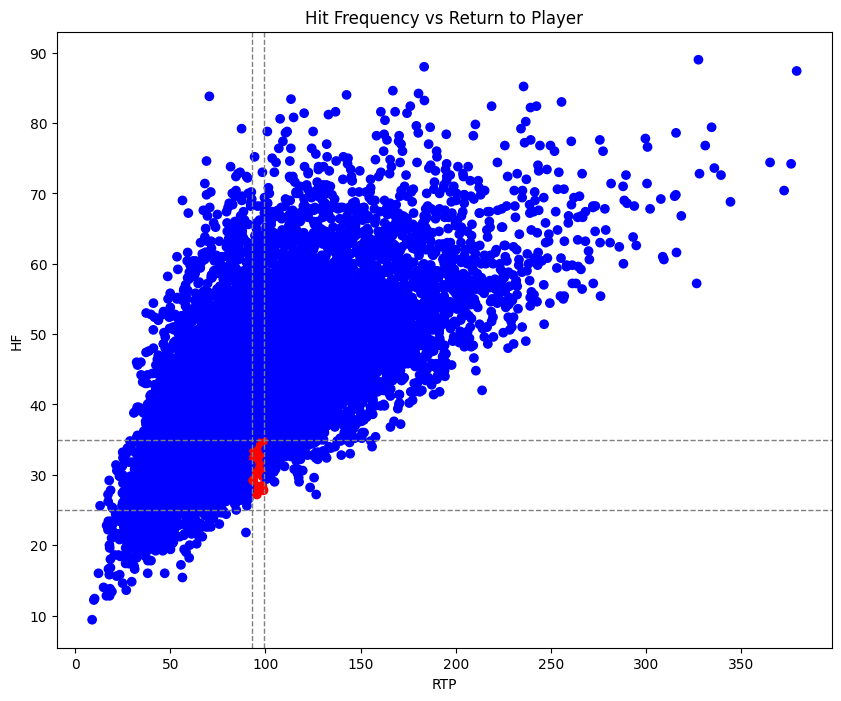

In [ ]:
# because there are only a few solutions for RTP within [95,97], so I widen it a bit
v1 = 93
v2 = 99
h1 = 25
h2 = 35

cond = (df['RTP']>=v1) & (df['RTP'] <= v2) & (df['HF']>=h1) & (df['HF'] <= h2)

plt.figure(figsize=(10,8))

plt.scatter(df['RTP'], df['HF'], c=np.where(cond, 'red', 'blue'), marker='o')
plt.xlabel('RTP')
plt.ylabel('HF')

#plt.xlim(0, 200)

plt.axvline(x=v1, color='gray', linestyle='--', linewidth=1)
plt.axvline(x=v2, color='gray', linestyle='--', linewidth=1)
plt.axhline(y=h1, color='gray', linestyle='--', linewidth=1)
plt.axhline(y=h2, color='gray', linestyle='--', linewidth=1)

plt.title("Hit Frequency vs Return to Player")

plt.show()

In [ ]:
df[cond]

,i,RTP,HF
30,30,96.70,30.8
134,134,98.90,29.8
547,547,98.24,31.0
647,647,96.76,32.4
822,822,98.06,33.6
...,...,...,...
9756,9756,97.08,33.6
9797,9797,98.04,28.4
9823,9823,95.50,30.2
9877,9877,94.06,33.4


In [ ]:
x.results[524].dirichlet

array([[0.08873868, 0.07527203, 0.26774971, 0.21202703, 0.17808552,
        0.17812702],
       [0.25977109, 0.18970848, 0.23856125, 0.15159472, 0.15322242,
        0.00714203],
       [0.15760156, 0.05691298, 0.06592203, 0.08559815, 0.37819681,
        0.25576848],
       [0.18293015, 0.0865215 , 0.43249941, 0.07300485, 0.08715111,
        0.13789298],
       [0.02903481, 0.00536491, 0.16676566, 0.07920482, 0.5962032 ,
        0.1234266 ]])

In [ ]:
Counter(x.results[524].outcome)

Counter({100: 21,
         0: 277,
         5: 134,
         25: 1,
         10: 21,
         2: 12,
         7: 9,
         105: 11,
         15: 3,
         12: 3,
         200: 2,
         9: 1,
         205: 1,
         14: 1,
         110: 3})

# Section 4: Mathematical Formulation

In our example, the window size is 5 reels with 3 rows; each reel has 6 symbols; using our previous notations; use index starts at 1 for reels and rows; and symbols start at 0 (because we use this 0 to denote the symbol with clearly 0 payout for any pattern)


Suppose in reel i, the symbol k, the associated probability is $p_{i,j}$, where i = 1,2,..., 5; j=0,1,2,..,5

Where,

$$
  \sum_{j=0}^5 p_{i,j} \ \forall i=1,2,...,5
$$

* note that the row doesn't affect the occurrence of any symbol, so it is not necessary to include row number in the probability

## 4.1: Mathematical Formulation



In our example, we defined the paylines can be determined by 5 different possibilities, and for each possibile payline, we have defined we can have (i) same symbol; or (ii) distinct symbols, both except 👻

Here we use 🍎 for example

1. horizontal line row 1
<table>
    <tr>
      <td bgcolor='#888888'>🍎</td><td bgcolor='#888888'>🍎</td><td bgcolor='#888888'>🍎</td><td bgcolor='#888888'>🍎</td><td bgcolor='#888888'>🍎</td>
    </tr>
    <tr>
      <td bgcolor='#444444'>👻</td><td bgcolor='#444444'>👻</td><td bgcolor='#444444'>👻</td><td bgcolor='#444444'>👻</td><td bgcolor='#444444'>👻</td>
    </tr>
    <tr>
      <td bgcolor='#444444'>👻</td><td bgcolor='#444444'>👻</td><td bgcolor='#444444'>👻</td><td bgcolor='#444444'>👻</td><td bgcolor='#444444'>👻</td>
    </tr>
</table>

2. horizontal line row 2
<table>
    <tr>
      <td bgcolor='#444444'>👻</td><td bgcolor='#444444'>👻</td><td bgcolor='#444444'>👻</td><td bgcolor='#444444'>👻</td><td bgcolor='#444444'>👻</td>
    </tr>
    <tr>
      <td bgcolor='#888888'>🍎</td><td bgcolor='#888888'>🍎</td><td bgcolor='#888888'>🍎</td><td bgcolor='#888888'>🍎</td><td bgcolor='#888888'>🍎</td>
    </tr>
    <tr>
      <td bgcolor='#444444'>👻</td><td bgcolor='#444444'>👻</td><td bgcolor='#444444'>👻</td><td bgcolor='#444444'>👻</td><td bgcolor='#444444'>👻</td>
    </tr>
</table>


3. horizontal line row 3
<table>
    <tr>
      <td bgcolor='#444444'>👻</td><td bgcolor='#444444'>👻</td><td bgcolor='#444444'>👻</td><td bgcolor='#444444'>👻</td><td bgcolor='#444444'>👻</td>
    </tr>
    <tr>
      <td bgcolor='#444444'>👻</td><td bgcolor='#444444'>👻</td><td bgcolor='#444444'>👻</td><td bgcolor='#444444'>👻</td><td bgcolor='#444444'>👻</td>
    </tr>
    <tr>
      <td bgcolor='#888888'>🍎</td><td bgcolor='#888888'>🍎</td><td bgcolor='#888888'>🍎</td><td bgcolor='#888888'>🍎</td><td bgcolor='#888888'>🍎</td>
    </tr>
</table>
4. V-shape line
<table>
    <tr>
      <td bgcolor='#888888'>🍎</td><td bgcolor='#444444'>👻</td><td bgcolor='#444444'>👻</td><td bgcolor='#444444'>👻</td><td bgcolor='#888888'>🍎</td>
    </tr>
    <tr>
      <td bgcolor='#444444'>👻</td><td bgcolor='#888888'>🍎</td><td bgcolor='#444444'>👻</td><td bgcolor='#888888'>🍎</td><td bgcolor='#444444'>👻</td>
    </tr>
    <tr>
      <td bgcolor='#444444'>👻</td><td bgcolor='#444444'>👻</td><td bgcolor='#888888'>🍎</td><td bgcolor='#444444'>👻</td><td bgcolor='#444444'>👻</td>
    </tr>
</table>

5. inverted-V-shape line
<table>
   <tr>
      <td bgcolor='#444444'>👻</td><td bgcolor='#444444'>👻</td><td bgcolor='#888888'>🍎</td><td bgcolor='#444444'>👻</td><td bgcolor='#444444'>👻</td>
    </tr>
    <tr>
      <td bgcolor='#444444'>👻</td><td bgcolor='#888888'>🍎</td><td bgcolor='#444444'>👻</td><td bgcolor='#888888'>🍎</td><td bgcolor='#444444'>👻</td>
    </tr>
    <tr>
      <td bgcolor='#888888'>🍎</td><td bgcolor='#444444'>👻</td><td bgcolor='#444444'>👻</td><td bgcolor='#444444'>👻</td><td bgcolor='#888888'>🍎</td>
    </tr>
</table>







Before calculating the probability of matched any paylines, first note that, if any one payline matched all same symbols, then it is **impossible** to match distinct V-shape and distinct inverted-V-shape; but matched (inverted) V-shape same symbols is possible

Our symbol set would the the following:

ghost = Symbol(0, '👻')
apple = Symbol(1, '🍎')
lemon = Symbol(2, '🍋')
kiwi = Symbol(3, '🥝')
pizza = Symbol(4, '🍕')
cheese = Symbol(5, '🧀')

#### All 5 paylines are matched

The 2 possibilities is all symbols for all positions are the same (except ghost); or distinct symbols across reels, but the same for all rows

\begin{align}
&P(\text{All 5 Paylines}) \\
&= \sum_{j=1}^5 (\prod_{i=1}^5 p_{i,j})^3
\end{align}



##### Case 1


<table>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
</table>

\begin{align}
&P(\text{Matched all 5 paylines, all identical symbols}) \\
&= (p_{1,1}p_{2,1}p_{3,1}p_{4,1}p_{5,1})^3 + ... + (p_{1,5}p_{2,5}p_{3,5}p_{4,5}p_{5,5})^3 \\
&= \sum_{j=1}^5 (\prod_{i=1}^5 p_{i,j})^3
\end{align}



#### Matched exactly 4 paylines

\begin{align}
&P(\text{Exactly 4 paylines}) \\
&=2 \sum_{j=1}^5 (\prod_{i=1}^5 p_{i,j})^2 \times p_{1,j} p_{3,j} p_{5,j} (1-p_{2,j}p_{4,j}) + \sum_{j=1}^5 (\prod_{i=1}^5 p_{i,j})^2 \times p_{2,j} p_{4,j} (1-p_{1,j}p_{3,j}p_{5,j})
\end{align}


##### Case 1: Top 2 / Bottom 2 Rows + V + inverted-V; all identical symbols

<table>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
</table>

or

<table>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
</table>

The only requirements is those 2 placeholders are not all apple:

\begin{align}
&P(\text{4 paylines, identical symbols, left 2 specific positions with symbols not the both the same as the target symbol}) \\
&= 2 \sum_{j=1}^5 (\prod_{i=1}^5 p_{i,j})^2 \times p_{1,j} p_{3,j} p_{5,j} (1-p_{2,j}p_{4,j})
\end{align}


##### Case 2: Top row + bottom row + V + inverted-V; all identical symbols


<table>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
    <tr>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
    </tr>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
</table>

\begin{align}
&P(\text{4 paylines, identical symbols, in the middle row left 3 specific positions with symbols not the both the same as the target symbol}) \\
&= \sum_{j=1}^5 (\prod_{i=1}^5 p_{i,j})^2 \times p_{2,j} p_{4,j} (1-p_{1,j}p_{3,j}p_{5,j})
\end{align}


#### Matched exactly 3 paylines

It is worth to note that, once identical rows with differnt symbols occur, it is impossible to form V-shape or inverted V-shape


\begin{align}
&P(\text{exactly 3 paylines}) \\
&= 2 \sum_{j=1}^5 (\prod_{i=1}^5 p_{i,j})^2 p_{3,j} (1-p_{1,j}p_{5,j}) \\
&\quad\quad+ 2 \sum_{j=1}^5 (\prod_{i=1}^5 p_{i,j})^2 p_{1,j} p_{5,j} (1-p_{3,j}) \\
&\quad\quad + 2\sum_{j=1}^5 (\prod_{i=1}^5 p_{i,j})^2 (1-p_{1,j}p_{3,j}p_{5,j}) (1-p_{2,j}p_{4,j}) \\
&\quad\quad + \sum_{j=1}^5 (\prod_{i=1}^5 p_{i,j}) \times [p_{1,j}p_{3,j}p_{5,j} (1-p_{2,j}p_{4,j})]^2 \\
& \quad\quad+ 3\sum_{\text{j,k} \in S} (\prod_{i=1}^5 p_{i,j} \times (\prod_{i=1}^5 p_{i,k})^2) \\
&\quad\quad + \sum_{\text{j,k,h} \in S} (\prod_{i=1}^5 p_{i,j} \times \prod_{i=1}^5 p_{i,k} \times \prod_{i=1}^5 p_{i,h})
\end{align}



##### Case 1: Top 2 rows + V / Bottom 2 rows + inverted-V; identical symbols

<table>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
    <tr>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
    </tr>
</table>

or
<table>
    <tr>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
    </tr>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
</table>


\begin{align}
&P(\text{2 idential rows with all the same symbols, plus the remaining row's center symbol is of the same one, the end 2 are not the same as the target}) \\
&= 2 \sum_{j=1}^5 (\prod_{i=1}^5 p_{i,j})^2 p_{3,j} (1-p_{1,j}p_{5,j})
\end{align}




##### Case 2: Top 2 rows + inverted-V / Bottom 2 rows + V; identical symbols

<table>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
</table>

or
<table>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
</table>



\begin{align}
&P(\text{2 idential rows with all the same symbols, plus the remaining row's center symbol must not the same one, the end 2 are the same target}) \\
&= 2 \sum_{j=1}^5 (\prod_{i=1}^5 p_{i,j})^2 p_{1,j} p_{5,j} (1-p_{3,j})
\end{align}




##### Case 3: V-shape + inverted-V + Top/Bottom rows; identical symbols

<table>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
    <tr>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
    </tr>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
</table>

or

<table>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
    <tr>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
    </tr>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
</table>


\begin{align}
&P(\text{3 paylines, one horizontal at the top/bottom, V-shape, and inverted-V; for remaining rows, all placeholders' symbol are not all the same as the target one}) \\
&= 2\sum_{j=1}^5 (\prod_{i=1}^5 p_{i,j}) \times [p_{2,j}p_{4,j}(1-p_{1,j}p_{3,j}p_{5,j})] \times [p_{1,j}p_{3,j}p_{5,j} (1-p_{2,j}p_{4,j})] \\
&= 2\sum_{j=1}^5 (\prod_{i=1}^5 p_{i,j})^2 (1-p_{1,j}p_{3,j}p_{5,j}) (1-p_{2,j}p_{4,j})
\end{align}



##### Case 4: Middle row + V + inverted-V; identical symbols

<table>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
</table>



\begin{align}
&P(\text{3 paylines, one horizontal in the middle, V-shape, and inverted-V; for top/bottom rows, all placeholders' symbol are not all the same as the target one}) \\
&= \sum_{j=1}^5 (\prod_{i=1}^5 p_{i,j}) \times [p_{1,j}p_{3,j}p_{5,j} (1-p_{2,j}p_{4,j})]^2
\end{align}



##### Case 5: 3 Horizontal rows, identical symbols, 2 rows are identical symbol + 1 row with another symbol

Any 2 symbols from 5 eligible symbols, matched all 3 horizontal paylines

<table>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
    <tr>
      <td bgcolor='#888888'>🍋</td>
      <td bgcolor='#888888'>🍋</td>
      <td bgcolor='#888888'>🍋</td>
      <td bgcolor='#888888'>🍋</td>
      <td bgcolor='#888888'>🍋</td>
    </tr>
</table>

\begin{align}
&P(\text{matched 3 horizontal paylines, each row are identical symbols, different rows are different symbols}) \\
&= 3 \sum_{\text{j,k} \in S} (\prod_{i=1}^5 p_{i,j} \times (\prod_{i=1}^5 p_{i,k})^2)
\end{align}
where the index set

$S = \{ \text{choose any 2 number from 1,2,3,4,5 without replacement} \} $

The reason why it is a multiple of 3, is due to the index set S will generate 5C2 * 2! = 20 permutations. the x3 is for the final arrangements of the rows.

For instance, once of the index will be (j,k)=(4,2), so 4 will have one row, 2 will have two rows. Finally, these 3 rows will have 3 possible arrangements (because 3!/2! = 3)



##### Case 6: 3 Horizontal Rows, identical symbols, distinct symbol for distinct rows


Any 3 symbols from 5 eligible symbols, matched all 3 horizontal paylines

<table>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
    <tr>
      <td bgcolor='#888888'>🍋</td>
      <td bgcolor='#888888'>🍋</td>
      <td bgcolor='#888888'>🍋</td>
      <td bgcolor='#888888'>🍋</td>
      <td bgcolor='#888888'>🍋</td>
    </tr>
    <tr>
      <td bgcolor='#888888'>🥝</td>
      <td bgcolor='#888888'>🥝</td>
      <td bgcolor='#888888'>🥝</td>
      <td bgcolor='#888888'>🥝</td>
      <td bgcolor='#888888'>🥝</td>
    </tr>
</table>

\begin{align}
&P(\text{matched 3 horizontal paylines, each row are identical symbols, different rows are different symbols}) \\
&= \sum_{\text{j,k,h} \in S} (\prod_{i=1}^5 p_{i,j} \times \prod_{i=1}^5 p_{i,k} \times \prod_{i=1}^5 p_{i,h})
\end{align}
where the index set

$S = \{ \text{choose any 3 number from 1,2,3,4,5 without replacement} \} $
where the size is 5C3 * 3! = 60 possible permutations
(1,2,3), (1,2,4), (1,2,5) ... (5,4,3)

#### Matched exactly 2 paylines


\begin{align}
&P(\text{Exactly 2 Paylines}) \\
&= 2\sum_{j=1}^5 (\prod_{i=1}^5 p_{i,j})^2 \times [ 1 - (\sum_{k \neq j}^5\prod_{i=1}^5 p_{i,k} + p_{3,j} + p_{1,j}p_{5,j} - p_{1,j}p_{3,j}p_{5,j})] \\
&\quad\quad + \sum_{j=1}^5 (\prod_{i=1}^5 p_{i,j})^2 \times [1-(\sum_{k \neq j}^5\prod_{i=1}^5 p_{i,k} + p_{2,j}p_{4,j})] \\
&\quad\quad + 2 \sum_{j=1}^5 \prod_{i=1}^5 p_{i,j} \times p_{2,j}p_{4,j}(1-p_{1,j}p_{3,j}p_{5,j}) \times p_{3,j}(1-p_{1,j}p_{5,j}) \\
&\quad\quad + 2 \sum_{j=1}^5 (\prod_{i=1}^5) p_{i,j} \times p_{3,j}(p_{1,j}p_{5,j}) [1 - (p_{2,j}p_{3,j}p_{4,j} + p_{1,j}p_{2,j}p_{4,j}p_{5,j} + p_{3,j}p_{1,j}p_{5,j} - 2 \prod_{i=1}^5 p_{i,j})] \\
&\quad\quad + 2 \sum_{j=1}^5 (\prod_{i=1}^5 p_{i,j}) \times p_{2,j}p_{4,j}(1-p_{1,j}p_{3,j}p_{5,j}) \times p_{1,j}p_{5,j}(1-p_{3,j}) \\
&\quad\quad + \sum_{j=1}^5 [p_{1,j}p_{3,j}p_{5,j}(1 - p_{2,j}p_{4,j})]^2 \times [p_{2,j}p_{4,j}(1 - p_{1,j}p_{3,j}p_{5,j})] \\
&\quad\quad + 3! \sum_{j,k \in S} (\prod_{i=1}^5 p_{i,j}) \times (\prod_{k=1}^5 p_{i,k}) \times (1 - \sum_{j=1}^5 \prod_{i=1}^5 p_{i,j})
\end{align}


##### Case 1: Top+Middle / Midddle+Bottom rows, identical symbols; identical rows


<table>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
    <tr>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
    </tr>
</table>

or


<table>
    <tr>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
    </tr>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
</table>

* for simple, denote **A** means "symbol j"
\begin{align}
&P(\text{match payline | reel 3 is A | reel 1,5 is A}) \\
&=P(\text{match payline}) + P(\text{reel 3 is A}) + P(\text{reel1,5 is A}) \\
&\quad\quad - P(\text{match payline & reel 3 is A}) - P(\text{match payline & reel 1,5 is A}) - P(\text{reel3 is A & reel 1,5 is A}) \\
& \quad\quad + P(\text{match payline & reel 3 is A & reel 1,5 is A}) \\
&= \sum_{j=1}^5\prod_{i=1}^5 p_{i,j} + p_{3,j} + p_{1,j}p_{5,j} \\
& \quad\quad - \prod_{i=1}^5 p_{i,j} - \prod_{i=1}^5 p_{i,j} - p_{1,j}p_{3,j}p_{5,j} \\
& \quad\quad + \prod_{i=1}^5 p_{i,j} \\
&= \sum_{k \neq j}^5\prod_{i=1}^5 p_{i,k} + p_{3,j} + p_{1,j}p_{5,j} - p_{1,j}p_{3,j}p_{5,j}
\end{align}

<br/>
<br/>
<br/>
so,

\begin{align}
&P(\text{matched 2 horizontal paylines together; the remaining row, reel 3 must not the same target symbol, reel 1 and 5 cannot both the same target symbol or formed a payline }) \\
&= 2\sum_{j=1}^5 (\prod_{i=1}^5 p_{i,j})^2 \times [ 1 - (\sum_{k \neq j}^5\prod_{i=1}^5 p_{i,k} + p_{3,j} + p_{1,j}p_{5,j} - p_{1,j}p_{3,j}p_{5,j})]
\end{align}

##### Case 2: Top + Bottom rows, identical symbols; identical rows

<table>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
    <tr>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
    </tr>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
</table>

* for simple, denote **A** means "symbol j"
\begin{align}
&P(\text{match payline | reel 2,4 is A}) \\
&=P(\text{match payline}) + P(\text{reel2,4 is A}) - P(\text{match payline & reel 2,4 is A}) \\
&= \sum_{j=1}^5\prod_{i=1}^5 p_{i,j} + p_{2,j}p_{4,j} -  \prod_{i=1}^5 p_{i,j} \\
&= \sum_{k \neq j}^5\prod_{i=1}^5 p_{i,k} + p_{2,j}p_{4,j}
\end{align}

so,
\begin{align}
&P(\text{matched 2 horizontal paylines top and bottom; the remaining row; reel 4 and 4 cannot both the same target symbol or row 2 cannot match any payline}) \\
&= \sum_{j=1}^5 (\prod_{i=1}^5 p_{i,j})^2 \times [1-(\sum_{k \neq j}^5\prod_{i=1}^5 p_{i,k} +  p_{2,j}p_{4,j})]
\end{align}

##### Case 3: Top row + V-shape / Bottom row + inverted-V, identical symbols

<table>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
    <tr>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
    </tr>
    <tr>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
    </tr>
</table>

or
<table>
    <tr>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
    </tr>
    <tr>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
    </tr>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
</table>


\begin{align}
&P(\text{Matched top horizontal payline and V shape (symmtery), with row 2 placeholders not all the same symbol as target, and row 3 reel 1,5 are not the same symbol as target}) \\
&= 2 \sum_{j=1}^5 \prod_{i=1}^5 p_{i,j} \times p_{2,j}p_{4,j}(1-p_{1,j}p_{3,j}p_{5,j}) \times p_{3,j}(1-p_{1,j}p_{5,j})
\end{align}



##### Case 4: Middle row + V-shape / inverted-V, identical symbols

<table>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
    <tr>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
    </tr>
</table>

or
<table>
    <tr>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
    </tr>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
</table>

* for simple, denote **A** means "symbol j"

Complements of Restrictions on Row 1 and Row 3 placeholders:
\begin{align}
&P(\text{Row 1 reel 2,3,4 are A | Row 3 reel 1,2,4,5 are A | Row 1 reel 3, Row 3 reel 1,5 are all A}) \\
&= P(\text{Row 1 reel 2,3,4 are A}) + P(\text{Row 3 reel 1,2,4,5 are A}) + P(\text{Row 1 reel 3, Row 3 reel 1,5 are all A}) \\
&\quad\quad\quad\quad - P(\text{Row 1 reel 2,3,4 are A & Row 3 reel 1,2,4,5 are A}) \\
&\quad\quad\quad\quad - P(\text{Row 1 reel 2,3,4 are A & Row 1 reel 3, Row 3 reel 1,5 are all A}) \\
&\quad\quad\quad\quad - P(\text{Row 3 reel 1,2,4,5 are A & Row 1 reel 3, Row 3 reel 1,5 are all A}) \\
&\quad\quad + P(\text{Row 1 reel 2,3,4 are A & Row 3 reel 1,2,4,5 are A & Row 1 reel 3, Row 3 reel 1,5 are all A}) \\
&= p_{2,j}p_{3,j}p_{4,j} + p_{1,j}p_{2,j}p_{4,j}p_{5,j} + p_{3,j}p_{1,j}p_{5,j} \\
&\quad\quad\quad\quad - (p_{2,j}p_{3,j}p_{4,j})(p_{1,j}p_{2,j}p_{4,j}p_{5,j}) \\
&\quad\quad\quad\quad - (p_{2,j}p_{3,j}p_{4,j})(p_{1,j}p_{5,j}) \\
&\quad\quad\quad\quad - p_{3,j}(p_{1,j}p_{2,j}p_{4,j}p_{5,j}) \\
&\quad\quad + (p_{2,j}p_{3,j}p_{4,j})(p_{1,j}p_{2,j}p_{4,j}p_{5,j}) \\
&= p_{2,j}p_{3,j}p_{4,j} + p_{1,j}p_{2,j}p_{4,j}p_{5,j} + p_{3,j}p_{1,j}p_{5,j} - 2 \prod_{i=1}^5 p_{i,j}
\end{align}



so,
\begin{align}
&P(\text{Matched middle horizontal payline and V shape (and symmtery) only}) \\
&= 2 \sum_{j=1}^5 (\prod_{i=1}^5) p_{i,j} \times p_{3,j}(p_{1,j}p_{5,j}) [1 - (p_{2,j}p_{3,j}p_{4,j} + p_{1,j}p_{2,j}p_{4,j}p_{5,j} + p_{3,j}p_{1,j}p_{5,j} - 2 \prod_{i=1}^5 p_{i,j})]
\end{align}



##### Case 5: Top row + inverted-V-shape / Bottom row + V-shape, identical symbols

<table>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
    <tr>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
    </tr>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
</table>

or
<table>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
    <tr>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
    </tr>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
</table>


\begin{align}
&P(\text{Matched top horizontal payline and inverted-V shape (symmtery) only}) \\
&= 2 \sum_{j=1}^5 (\prod_{i=1}^5 p_{i,j}) \times p_{2,j}p_{4,j}(1-p_{1,j}p_{3,j}p_{5,j}) \times p_{1,j}p_{5,j}(1-p_{3,j})
\end{align}



##### Case 6: V-shape + inverted-V, identical symbols

<table>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
    <tr>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
    </tr>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
</table>


\begin{align}
&P(\text{Matched both V-shape and inverted-V-shape only}) \\
&= \sum_{j=1}^5 [p_{1,j}p_{3,j}p_{5,j}(1 - p_{2,j}p_{4,j})]^2 \times [p_{2,j}p_{4,j}(1 - p_{1,j}p_{3,j}p_{5,j})]
\end{align}


##### Case 7: Any 2 horizontal rows, identpcal symbols each row, distinct symbol for distinct row


<table>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
    <tr>
      <td bgcolor='#888888'>🍋</td>
      <td bgcolor='#888888'>🍋</td>
      <td bgcolor='#888888'>🍋</td>
      <td bgcolor='#888888'>🍋</td>
      <td bgcolor='#888888'>🍋</td>
    </tr>
    <tr>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
    </tr>
</table>

and their rows' arragement


\begin{align}
&P(\text{any 2 rows matched same symbols payline, where these 2 rows' symbol are distinct}) \\
&= 3! \sum_{j,k \in S} (\prod_{i=1}^5 p_{i,j}) \times (\prod_{k=1}^5 p_{i,k}) \times (1 - \sum_{j=1}^5 \prod_{i=1}^5 p_{i,j})
\end{align}


where the index set

$S = \{ \text{choose any 2 number from 1,2,3,4,5 without replacement} \} $
where the size is 5C2 = 10 possible combinatinos


#### Matched exactly 1 payline

##### Case 1: Top / Bottom Row, identical symbols


<table>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
    <tr>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
    </tr>
    <tr>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
    </tr>
</table>

or

<table>
    <tr>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
    </tr>
    <tr>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
    </tr>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
</table>


** Because we have already derived all higher-order paylines probability, so it is possible to simply use P(top row) - all higher probabilities involved top row, then x2.

More generally, we can combine middle row and top/bottom row event into "Single Horizontal Row", and subtract all higher order probabilities involved horizontal row.
To prove the understanding of probability calculation, we still use the ordinary method

We need to find the complement of sestrictions on the placeholders:
\begin{align}
&P(\text{Row 2 matched payline | Row 3 matched payline | Row 2 reel 2,4, Row 3 reel 3 are A | Row 2 reel 2,4, Row 3 reel 1,5, are A})
\end{align}


Using the formula:
\begin{align}
&P(A \cup B \cup C \cup D) \\
&= P(A) + P(B) + P(C) + P(D) \\
&\quad\quad - P(A \cap B) - P(A \cap C) - P(A \cap D) - P(B \cap C) - P(B \cap D) - P(C \cap D) \\
&\quad\quad + P(A \cap B \cap C) + P(A \cap B \cap D) + P(A \cap C \cap D) + P(B \cap C \cap D) \\
&\quad\quad - P(A \cap B \cap C \cap D)
\end{align}

Define:
Event 1 = Row 2 matched payline
Event 2 = Row 3 matched payline
Event 3 = Row 2 reel 2,4, Row 3 reel 3 are A
Event 4 = Row 2 reel 2,4, Row 3 reel 1,5, are A


* for simple, denote **A** means "symbol j"
So,

\begin{align}
P(\text{Event 1}) &= P(\text{Row 2 matched payline}) \\
                  &= \sum_{j=1}^5 \prod_{i=1}^5 p_{i,j} \\
P(\text{Event 2}) &= P(\text{Row 3 matched payline}) \\
                  &= \sum_{j=1}^5 \prod_{i=1}^5 p_{i,j} \\
P(\text{Event 3}) &= P(\text{Row 2 reel 2,4, Row 3 reel 3 are A}) \\
                  &= (p_{2,j}p_{4,j}) p_{3,j} \\
                  &= p_{2,j}p_{3,j}p_{4,j} \\
P(\text{Event 4}) &= P(\text{Row 2 reel 2,4, Row 3 reel 1,5, are A}) \\
                  &= (p_{2,j}p_{4,j})(p_{1,j}p_{5,j}) \\
                  &= p_{1,j}p_{2,j}p_{4,j}p_{5,j} \\
P(\text{Event 1 and Event 2}) &= P(\text{Row 2 matched payline & Row 3 matched payline}) \\
                        &= (\sum_{j=1}^5 \prod_{i=1}^5 p_{i,j})^2 \\
P(\text{Event 1 and Event 3}) &= P(\text{Row 2 matched payline & Row 2 reel 2,4, Row 3 reel 3 are A}) \\
                        &= (\prod_{i=1}^5 p_{i,j})p_{3,j} \\
P(\text{Event 1 and Event 4}) &= P(\text{Row 2 matched payline & Row 2 reel 2,4, Row 3 reel 1,5, are A}) \\
                        &= (\prod_{i=1}^5 p_{i,j})p_{1,j}p_{5,j} \\
P(\text{Event 2 and Event 3}) &= P(\text{Row 3 matched payline & Row 2 reel 2,4, Row 3 reel 3 are A}) \\
                        &= (\prod_{i=1}^5 p_{i,j})p_{2,j}p_{4,j} \\
P(\text{Event 2 and Event 4}) &= P(\text{Row 3 matched payline & Row 2 reel 2,4, Row 3 reel 1,5, are A}) \\
                        &= (\prod_{i=1}^5 p_{i,j})p_{2,j}p_{4,j} \\
P(\text{Event 3 and Event 4}) &= P(\text{Row 2 reel 2,4, Row 3 reel 3 are A & Row 2 reel 2,4, Row 3 reel 1,5, are A}) \\
                        &= (p_{2,j}p_{4,j})p_{3,j}(p_{1,j}p_{5,j}) \\
                        &= \prod_{i=1}^5 p_{i,j} \\
P(\text{Event 1 and Event 2 and Event 3}) &= P(\text{Row 2 matched payline & Row 3 matched payline & Row 2 reel 2,4, Row 3 reel 3 are A}) \\
                        &= (\prod_{i=1}^5 p_{i,j})^2 \\
P(\text{Event 1 and Event 2 and Event 4}) &= P(\text{Row 2 matched payline & Row 3 matched payline & Row 2 reel 2,4, Row 3 reel 1,5, are A}) \\
                        &= (\prod_{i=1}^5 p_{i,j})^2 \\
P(\text{Event 1 and Event 3 and Event 4}) &= P(\text{Row 2 matched payline & Row 2 reel 2,4, Row 3 reel 3 are A & Row 2 reel 2,4, Row 3 reel 1,5, are A}) \\
                        &= (\prod_{i=1}^5 p_{i,j})p_{3,j}p_{1,j}p_{5,j} \\
                        &= (\prod_{i=1}^5 p_{i,j})p_{1,j}p_{3,j}p_{5,j} \\
P(\text{Event 2 and Event 3 and Event 4}) &= P(\text{Row 3 matched payline & Row 2 reel 2,4, Row 3 reel 3 are A & Row 2 reel 2,4, Row 3 reel 1,5, are A}) \\
                        &= (\prod_{i=1}^5 p_{i,j})p_{2,j}p_{4,j} \\
P(\text{Event 1 and Event 2 and Event 3 and Event 4}) \\
&=P(\text{Row 2 matched payline & Row 3 matched payline & Row 2 reel 2,4, Row 3 reel 3 are A & Row 2 reel 2,4, Row 3 reel 1,5, are A}) \\
                        &= (\prod_{i=1}^5 p_{i,j})^2
\end{align}


So,
\begin{align}
&P(\text{Event 1 or Event 2 or Event 3 or Event 4}) \\
&= (\sum_{j=1}^5 \prod_{i=1}^5 p_{i,j} + \sum_{j=1}^5 \prod_{i=1}^5 p_{i,j} + p_{2,j}p_{3,j}p_{4,j} + p_{1,j}p_{2,j}p_{4,j}p_{5,j}) \\
&\quad\quad - [(\sum_{j=1}^5 \prod_{i=1}^5 p_{i,j})^2  + (\prod_{i=1}^5 p_{i,j})p_{3,j} + (\prod_{i=1}^5 p_{i,j})p_{1,j}p_{5,j} + (\prod_{i=1}^5 p_{i,j})p_{2,j}p_{4,j} + (\prod_{i=1}^5 p_{i,j})p_{2,j}p_{4,j} + \prod_{i=1}^5 p_{i,j}] \\
&\quad\quad\quad\quad + [(\prod_{i=1}^5 p_{i,j})^2 + (\prod_{i=1}^5 p_{i,j})^2 + (\prod_{i=1}^5 p_{i,j})p_{1,j}p_{3,j}p_{5,j} + (\prod_{i=1}^5 p_{i,j})p_{2,j}p_{4,j}] \\
&\quad\quad - (\prod_{i=1}^5 p_{i,j})^2 \\
&= 2\sum_{j=1}^5 \prod_{i=1}^5 p_{i,j} - (\sum_{j=1}^5 \prod_{i=1}^5 p_{i,j})^2 + (\prod_{i=1}^5 p_{i,j})^2 + p_{2,j}p_{4,j}(p_{3,j}+ p_{1,j}p_{5,j}) + (\prod_{i=1}^5 p_{i,j}) (p_{1,j}p_{3,j}p_{5,j} - p_{3,j} - p_{1,j}p_{5,j} - p_{2,j}p_{4,j} - 1)
\end{align}


Hence,

\begin{align}
&P(\text{Matched top / bottom row only}) \\
&= 2 \sum_{j=1}^5 (\prod_{i=1}^5 p_{i,j})\{1 - [2\sum_{j=1}^5 \prod_{i=1}^5 p_{i,j} - (\sum_{j=1}^5 \prod_{i=1}^5 p_{i,j})^2 + (\prod_{i=1}^5 p_{i,j})^2 \\
&\quad\quad + p_{2,j}p_{4,j}(p_{3,j}+ p_{1,j}p_{5,j}) + (\prod_{i=1}^5 p_{i,j}) (p_{1,j}p_{3,j}p_{5,j} - p_{3,j} - p_{1,j}p_{5,j} - p_{2,j}p_{4,j} - 1)]\}
\end{align}




##### Case 2: Middle Row, identical symbols


<table>
    <tr>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
    </tr>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
    <tr>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
    </tr>
</table>


** Because we have already derived all higher-order paylines probability, so it is possible to simply use P(middle row) - all higher probabilities involved middle row.

More generally, we can combine middle row and top/bottom row event into "Single Horizontal Row", and subtract all higher order probabilities involved horizontal row.
To prove the understanding of probability calculation, we still use the ordinary method

We need to find the complement of sestrictions on the placeholders:
\begin{align}
&P(\text{Row 1 matched payline | Row 3 matched payline | Row 1 reel 1,5, Row 3 reel 3 are A | Row 1 reel 3, Row 3 reel 1,5, are A})
\end{align}

Using the formula:
\begin{align}
&P(A \cup B \cup C \cup D) \\
&= P(A) + P(B) + P(C) + P(D) \\
&\quad\quad - P(A \cap B) - P(A \cap C) - P(A \cap D) - P(B \cap C) - P(B \cap D) - P(C \cap D) \\
&\quad\quad + P(A \cap B \cap C) + P(A \cap B \cap D) + P(A \cap C \cap D) + P(B \cap C \cap D) \\
&\quad\quad - P(A \cap B \cap C \cap D)
\end{align}

Define:
Event 1 = Row 1 matched payline
Event 2 = Row 3 matched payline
Event 3 = Row 1 reel 1,5, Row 3 reel 3 are A
Event 4 = Row 1 reel 3, Row 3 reel 1,5, are A

Note that

By symmetry, we have the following relationships:
\begin{align}
P(\text{Event 1}) &= P(\text{Event 2}) \\
P(\text{Event 3}) &= P(\text{Event 4}) \\
P(\text{Event 1 & 3}) &= P(\text{Event 2 & 4}) \\
P(\text{Event 1 & 4}) &= P(\text{Event 2 & 3}) \\
P(\text{Event 1 & 2 & 3}) &= P(\text{Event 1 & 2 & 4}) \\
P(\text{Event 1 & 3 & 4}) &= P(\text{Event 2 & 3 & 4})
\end{align}

Then,
\begin{align}
P(\text{Event 1}) &= P(\text{Row 1 matched payline}) \\
                  &= \sum_{j=1}^5 \prod_{i=1}^5 p_{i,j} \\
P(\text{Event 3}) &= P(\text{Row 1 reel 1,5, Row 3 reel 3 are A}) \\
                  &= (p_{1,j}p_{5,j})p_{3,j} \\
                  &= p_{1,j}p_{3,j}p_{5,j} \\
P(\text{Event 1 and Event 2}) &= P(\text{Row 1 matched payline & Row 3 matched payline}) \\
                              &= (\sum_{j=1}^5 \prod_{i=1}^5 p_{i,j})^2 \\
P(\text{Event 1 and Event 3}) &= P(\text{Row 1 matched payline & Row 1 reel 1,5, Row 3 reel 3 are A}) \\
                              &= (\prod_{i=1}^5 p_{i,j}) p_{3,j}\\
P(\text{Event 1 and Event 4}) &= P(\text{Row 1 matched payline & Row 1 reel 3, Row 3 reel 1,5, are A}) \\
                              &= (\prod_{i=1}^5 p_{i,j}) p_{1,j}p_{5,j}\\
P(\text{Event 3 and Event 4}) &= P(\text{Row 1 reel 1,5, Row 3 reel 3 are A & Row 1 reel 3, Row 3 reel 1,5, are A}) \\
                              &= [(p_{1,j}p_{5,j})p_{3,j}] \times [p_{3,j}(p_{1,j}p_{5,j})]\\
                              &= p_{1,j}^2 p_{3,j}^2 p_{5,j}^2 \\
P(\text{Event 1 and Event 2 and Event 3}) &= P(\text{Row 1 matched payline & Row 3 matched payline & Row 1 reel 1,5, Row 3 reel 3 are A}) \\
                                          &= (\prod_{i=1}^5 p_{i,j}) \times (\prod_{i=1}^5 p_{i,j}) \\
                                          &= (\prod_{i=1}^5 p_{i,j})^2 \\
P(\text{Event 1 and Event 3 and Event 4}) &= P(\text{Row 1 matched payline & Row 1 reel 1,5, Row 3 reel 3 are A & Row 1 reel 3, Row 3 reel 1,5, are A}) \\
                                          &= (\prod_{i=1}^5 p_{i,j}) p_{1,j}p_{3,j}p_{5,j} \\
P(\text{Event 1 and Event 2 and Event 3 and Event 4}) \\
&= (\prod_{i=1}^5 p_{i,j}) \times (\prod_{i=1}^5 p_{i,j}) \\
&= (\prod_{i=1}^5 p_{i,j})^2
\end{align}

So,
\begin{align}
&P(\text{Event 1 or Event 2 or Event 3 or Event 4}) \\
&= 2 (\sum_{j=1}^5 \prod_{i=1}^5 p_{i,j} + p_{1,j}p_{3,j}p_{5,j}) \\
&\quad\quad - \{(\sum_{j=1}^5 \prod_{i=1}^5 p_{i,j})^2 + 2 [(\prod_{i=1}^5 p_{i,j}) p_{3,j} + (\prod_{i=1}^5 p_{i,j}) p_{1,j}p_{5,j}] + p_{1,j}^2 p_{3,j}^2 p_{5,j}^2 \} \\
&\quad\quad + 2 \{(\prod_{i=1}^5 p_{i,j})^2 + (\prod_{i=1}^5 p_{i,j}) p_{1,j}p_{3,j}p_{5,j}\} \\
&\quad\quad - (\prod_{i=1}^5 p_{i,j})^2 \\
&= 2 \sum_{j=1}^5 \prod_{i=1}^5 p_{i,j} - (\sum_{j=1}^5 \prod_{i=1}^5 p_{i,j})^2 + (\prod_{i=1}^5 p_{i,j})^2 + 2 p_{1,j}p_{3,j}p_{5,j} - p_{1,j}^2 p_{3,j}^2 p_{5,j}^2 + 2(\prod_{i=1}^5 p_{i,j})(p_{1,j}p_{3,j}p_{5,j}- p_{3,j} - p_{1,j}p_{5,j})
\end{align}

Hence,

\begin{align}
&P(\text{Matched middle row only}) \\
&=\sum_{j=1}^5 (\prod_{i=1}^5 p_{i,j})\{1 - [2 \sum_{j=1}^5 \prod_{i=1}^5 p_{i,j} - (\sum_{j=1}^5 \prod_{i=1}^5 p_{i,j})^2 + (\prod_{i=1}^5 p_{i,j})^2 + 2 p_{1,j}p_{3,j}p_{5,j} - p_{1,j}^2 p_{3,j}^2 p_{5,j}^2 + 2(\prod_{i=1}^5 p_{i,j})(p_{1,j}p_{3,j}p_{5,j}- p_{3,j} - p_{1,j}p_{5,j})]\}
\end{align}



##### Case 3: V / inverted-V shape, identical symbols


<table>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
    <tr>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
    </tr>
    <tr>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
    </tr>
</table>

or

<table>
    <tr>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
    </tr>
    <tr>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
    </tr>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
</table>


** Because we have already derived all higher-order paylines probability, so it is possible to simply use P(V or inverted-V) - all higher probabilities involved V or inverted-V.
To prove the understanding of probability calculation, this simpler case, we still use the ordinary method

We need to find the complement of sestrictions on the placeholders:
\begin{align}
&P(\text{Row 1 reel 2,3,4 are A | Row 2 reel 1,3,5 are A | Row 3 reel 1,2,4,5 are A | Row 1 reel 3, Row 3 reel 1,5 are A})
\end{align}

Using the formula:
\begin{align}
&P(A \cup B \cup C \cup D) \\
&= P(A) + P(B) + P(C) + P(D) \\
&\quad\quad - P(A \cap B) - P(A \cap C) - P(A \cap D) - P(B \cap C) - P(B \cap D) - P(C \cap D) \\
&\quad\quad + P(A \cap B \cap C) + P(A \cap B \cap D) + P(A \cap C \cap D) + P(B \cap C \cap D) \\
&\quad\quad - P(A \cap B \cap C \cap D)
\end{align}

Define:
Event 1 = Row 1 reel 2,3,4 are A
Event 2 = Row 2 reel 1,3,5 are A
Event 3 = Row 3 reel 1,2,4,5 are A
Event 4 = Row 1 reel 3, Row 3 reel 1,5 are A


* for simple, denote **A** means "symbol j"
So,
\begin{align}
P(\text{Event 1}) &= P(\text{Row 1 reel 2,3,4 are A}) \\
                  &= p_{2,j}p_{3,j}p_{4,j} \\
P(\text{Event 2}) &= P(\text{Row 2 reel 1,3,5 are A}) \\
                  &= p_{1,j}p_{3,j}p_{5,j} \\
P(\text{Event 3}) &= P(\text{Row 3 reel 1,2,4,5 are A}) \\
                  &= p_{1,j}p_{2,j}p_{4,j}p_{5,j} \\
P(\text{Event 4}) &= P(\text{Row 1 reel 3, Row 3 reel 1,5 are A}) \\
                  &= p_{3,j}(p_{1,j}p_{5,j}) \\
                  &= p_{1,j}p_{3,j}p_{5,j}
\end{align}

\begin{align}
P(\text{Event 1 and Event 2}) &= P(\text{Row 1 reel 2,3,4 are A & Row 2 reel 1,3,5 are A}) \\
                              &= (p_{2,j}p_{3,j}p_{4,j})(p_{1,j}p_{3,j}p_{5,j}) \\
                              &= p_{1,j} p_{2,j} p_{3,j}^2 p_{4,j} p_{5,j} \\
P(\text{Event 1 and Event 3}) &= P(\text{Row 1 reel 2,3,4 are A & Row 3 reel 1,2,4,5 are A}) \\
                              &= (p_{2,j}p_{3,j}p_{4,j})(p_{1,j}p_{2,j}p_{4,j}p_{5,j}) \\
                              &= p_{1,j} p_{2,j}^2 p_{3,j} p_{4,j}^2 p_{5,j} \\
P(\text{Event 1 and Event 4}) &= P(\text{Row 1 reel 2,3,4 are A & Row 1 reel 3, Row 3 reel 1,5 are A}) \\
                              &= (p_{2,j}p_{3,j}p_{4,j})(p_{1,j}p_{5,j}) \\
                              &= p_{1,j}p_{2,j}p_{3,j}p_{4,j}p_{5,j} \\
P(\text{Event 2 and Event 3}) &= P(\text{Row 2 reel 1,3,5 are A & Row 3 reel 1,2,4,5 are A}) \\
                              &= (p_{1,j}p_{3,j}p_{5,j})(p_{1,j}p_{2,j}p_{4,j}p_{5,j}) \\
                              &= p_{1,j}^2 p_{2,j} p_{3,j} p_{4,j} p_{5,j}^2 \\
P(\text{Event 2 and Event 4}) &= P(\text{Row 2 reel 1,3,5 are A & Row 1 reel 3, Row 3 reel 1,5 are A}) \\
                              &= p_{3,j}(p_{1,j}p_{3,j}p_{5,j})(p_{1,j}p_{5,j}) \\
                              &= p_{1,j}^2 p_{3,j}^2 p_{5,j}^2 \\
P(\text{Event 3 and Event 4}) &= P(\text{Row 3 reel 1,2,4,5 are A & Row 1 reel 3, Row 3 reel 1,5 are A}) \\
                              &= p_{3,j}(p_{1,j}p_{2,j}p_{4,j}p_{5,j}) \\
                              &= p_{1,j}p_{2,j}p_{3,j}p_{4,j}p_{5,j}
\end{align}


\begin{align}
P(\text{Event 1 and Event 2 and Event 3}) &= P(\text{Row 1 reel 2,3,4 are A & Row 2 reel 1,3,5 are A & Row 3 reel 1,2,4,5 are A}) \\
                                          &= (p_{2,j}p_{3,j}p_{4,j})(p_{1,j}p_{3,j}p_{5,j})(p_{1,j}p_{2,j}p_{4,j}p_{5,j}) \\
                                          &= p_{1,j}^2 p_{2,j}^2 p_{3,j}^2 p_{4,j}^2 p_{5,j}^2 \\
P(\text{Event 1 and Event 2 and Event 4}) &= P(\text{Row 1 reel 2,3,4 are A & Row 2 reel 1,3,5 are A & Row 1 reel 3, Row 3 reel 1,5 are A}) \\
                                          &= (p_{2,j}p_{3,j}p_{4,j})(p_{1,j}p_{3,j}p_{5,j})(p_{1,j}p_{5,j}) \\
                                          &= p_{1,j}^2 p_{2,j} p_{3,j}^2 p_{4,j} p_{5,j}^2 \\
P(\text{Event 1 and Event 3 and Event 4}) &= P(\text{Row 1 reel 2,3,4 are A & Row 3 reel 1,2,4,5 are A &Row 1 reel 3, Row 3 reel 1,5 are A}) \\
                                          &= (p_{2,j}p_{3,j}p_{4,j})(p_{1,j}p_{2,j}p_{4,j}p_{5,j}) \\
                                          &= p_{1,j} p_{2,j}^2 p_{3,j} p_{4,j}^2 p_{5,j} \\
P(\text{Event 2 and Event 3 and Event 4}) &= P(\text{Row 2 reel 1,3,5 are A & Row 3 reel 1,2,4,5 are A & Row 1 reel 3, Row 3 reel 1,5 are A}) \\
                                          &= (p_{1,j}p_{3,j}p_{5,j})(p_{1,j}p_{2,j}p_{4,j}p_{5,j})p_{3,j} \\
                                          &= p_{1,j}^2 p_{2,j} p_{3,j}^2 p_{4,j} p_{5,j}^2
\end{align}

\begin{align}
&P(\text{Event 1 and Event 2 and Event 3 and Event 4}) \\
&=P(\text{Row 1 reel 2,3,4 are A & Row 2 reel 1,3,5 are A & Row 3 reel 1,2,4,5 are A & Row 1 reel 3, Row 3 reel 1,5 are A}) \\
&= (p_{1,j}p_{3,j}p_{5,j})(p_{1,j}p_{3,j}p_{5,j})(p_{1,j}p_{2,j}p_{4,j}p_{5,j}) \\
&= p_{1,j}^3 p_{2,j} p_{3,j}^2 p_{4,j} p_{5,j}^3
\end{align}

so,


\begin{align}
&P(\text{Event 1 or Event 2 or Event 3 or Event 4}) \\
&\quad\quad p_{2,j}p_{3,j}p_{4,j} + 2 p_{1,j}p_{3,j}p_{5,j} + p_{1,j}p_{2,j}p_{4,j}p_{5,j} \\
&\quad\quad - (\prod_{i=1}^5 p_{i,j})(p_{3,j} + p_{2,j}p_{4,j}+ p_{1,j}p_{5,j} + 2) - p_{1,j}^2 p_{3,j}^2 p_{5,j}^2\\
&\quad\quad + (\prod_{i=1}^5 p_{i,j})[(\prod_
{i=1}^5 p_{i,j}) + p_{2,j}p_{4,j} + 2 p_{1,j}p_{3,j}p_{5,j}] \\
&\quad\quad - (\prod_{i=1}^5 p_{i,j})(p_{1,j}p_{3,j}p_{5,j}) \\
&= p_{2,j}p_{3,j}p_{4,j} + 2 p_{1,j}p_{3,j}p_{5,j} + p_{1,j}p_{2,j}p_{4,j}p_{5,j} - p_{1,j}^2 p_{3,j}^2 p_{5,j}^2 + (\prod_{i=1}^5 p_{i,j})[\prod_{i=1}^5 p_{i,j} + p_{1,j}p_{3,j}p_{5,j} - p_{3,j} - p_{1,j}p_{5,j} - 2]
\end{align}

Hence,

\begin{align}
&P(\text{Match V-shape or inverted-V-shape only}) \\
&= 2\sum p_{1,j}p_{2,j}p_{3,j}p_{4,j}p_{5,j} \times P(\text{Not occurred any Event 1 to 4}) \\
&= 2\sum_{j=1}^5 (\prod_{i=1}^5 p_{i,j}) \times (1 - \{p_{2,j}p_{3,j}p_{4,j} + 2 p_{1,j}p_{3,j}p_{5,j} + p_{1,j}p_{2,j}p_{4,j}p_{5,j} - p_{1,j}^2 p_{3,j}^2 p_{5,j}^2 + \\
&\quad\quad\quad\quad(\prod_{i=1}^5 p_{i,j})[\prod_{i=1}^5 p_{i,j} + p_{1,j}p_{3,j}p_{5,j} - p_{3,j} - p_{1,j}p_{5,j} - 2]\})
\end{align}


## 4.2: Simulations, Test, and Verifications

#### Simulation Functions

In [1]:

from collections import Counter


payout_payline_definition = {
    # for all are the same
    # 0 payout is not necessary to put in
    # it is also ok to combine "all" and "extra" by changing it to [1,1,1,1,1]
    # I am going to split into 2 cases "all" and "extra"
    "all": [
        {"key": 1, "payout": 20},
        {"key": 2, "payout": 25},
        {"key": 3, "payout": 30},
        {"key": 4, "payout": 50},
        {"key": 5, "payout": 75},
    ],
    # further combinations
    "extra": [
    #     {"keys": [1,2,3,4,5],
    #      "payout": {
    #         "match_order": 200,
    #         "else": 100}
    #     }
    ]
}

def payout_single_line(rows, payout_payline_definition):


  keys = [k for k in rows]
  key_counts = Counter(keys)
#  print(keys)
  # check if same keys, if so, check the first key
  if(sorted(list(key_counts.values())) == [len(keys)]):
    the_key = keys[0]
    for item in payout_payline_definition['all']:
      if item['key'] == the_key:
        return f"simple payline={keys}"

  # check for further combinations:
  else:
    for item in payout_payline_definition["extra"]:
      check_keys = item["keys"]
      # payout = item["payout"]
      # if check_keys == keys:
      #   return f"ordered payline={check_keys}"
      # else:
      if(check_keys == sorted(keys)):
        return f"unordered payline={check_keys}"

  # default
  return None


# to generalize the payout calculation, now considering the whole window

def payout_paylines(rows):
  if len(rows)!=3:
    raise Exception(f"must provide 3 rows, each of length 5 (because 5 reels), given rows={len(rows)}")

  horizontal_payline_1 = payout_single_line(rows[0], payout_payline_definition)
  horizontal_payline_2 = payout_single_line(rows[1], payout_payline_definition)
  horizontal_payline_3 = payout_single_line(rows[2], payout_payline_definition)

  v_payline = payout_single_line([rows[0][0], rows[1][1], rows[2][2], rows[1][3], rows[0][4]], payout_payline_definition)
  v_inverted_payline = payout_single_line([rows[2][0], rows[1][1], rows[0][2], rows[1][3], rows[2][4]], payout_payline_definition)

  return [item for item in [horizontal_payline_1, horizontal_payline_2,horizontal_payline_3,v_payline,v_inverted_payline]]

In [2]:
import numpy as np

#p = [0.05, 0.07, 0.07, 0.40, 0.40]
#p = [0.199] * 5
#p.insert(0, np.round(1-sum(p), 4))
p = np.array([[0, 0.005, 0.005, 0.33, 0.33, 0.33],
    [0, 0.005, 0.005,0.33, 0.33, 0.33],
              [0, 0.005, 0.005, 0.33, 0.33, 0.33],
              [0, 0.005, 0.005, 0.33, 0.33, 0.33],
              [0, 0.005, 0.005, 0.33, 0.33, 0.33]])


In [3]:
#p = np.random.dirichlet(np.ones(6), size = 5)


In [4]:
print(p)


[[0.    0.005 0.005 0.33  0.33  0.33 ]
 [0.    0.005 0.005 0.33  0.33  0.33 ]
 [0.    0.005 0.005 0.33  0.33  0.33 ]
 [0.    0.005 0.005 0.33  0.33  0.33 ]
 [0.    0.005 0.005 0.33  0.33  0.33 ]]


In [5]:
#payout_paylines(np.random.choice(a=range(6), size=(3,5)))
import pandas as pd
import math

#ddf = pd.DataFrame(columns=["h1", "h2", "h3", "v", "iv", "count", "data"])

def sim(N, m, p):

  df_list = [None] * m


  for j in range(m):
    if j % int(np.round(m/100)) == 0:
      print(f"j={j} / {m}")

    n = math.floor(N/m)
    nested_list = [None] * n
    for i in range(n):

      data_temp = []
      for pr in p:
        reel_outcome = np.random.choice(a=range(len(pr)), size=(3,1), p=pr)
        data_temp.append(reel_outcome)

      data = np.concatenate(data_temp, axis=1)

      d = payout_paylines(data)
      c = len([dd for dd in d if dd is not None])

      d.insert(5, c)
      d.insert(6, data)

      nested_list[i] = d

    df = pd.DataFrame(nested_list)

    df_list[j] = df

  ddf = pd.concat(df_list, axis=0)
  ddf.columns = ["h1", "h2", "h3", "v", "iv", "count", "data"]

  print(ddf.shape)

  return ddf




In [6]:
N = 2000000


m = int(np.round(N / 100, 0))

ddf = sim(N, m, p)


j=0 / 20000
j=200 / 20000
j=400 / 20000
j=600 / 20000
j=800 / 20000
j=1000 / 20000
j=1200 / 20000
j=1400 / 20000
j=1600 / 20000
j=1800 / 20000
j=2000 / 20000
j=2200 / 20000
j=2400 / 20000
j=2600 / 20000
j=2800 / 20000
j=3000 / 20000
j=3200 / 20000
j=3400 / 20000
j=3600 / 20000
j=3800 / 20000
j=4000 / 20000
j=4200 / 20000
j=4400 / 20000
j=4600 / 20000
j=4800 / 20000
j=5000 / 20000
j=5200 / 20000
j=5400 / 20000
j=5600 / 20000
j=5800 / 20000
j=6000 / 20000
j=6200 / 20000
j=6400 / 20000
j=6600 / 20000
j=6800 / 20000
j=7000 / 20000
j=7200 / 20000
j=7400 / 20000
j=7600 / 20000
j=7800 / 20000
j=8000 / 20000
j=8200 / 20000
j=8400 / 20000
j=8600 / 20000
j=8800 / 20000
j=9000 / 20000
j=9200 / 20000
j=9400 / 20000
j=9600 / 20000
j=9800 / 20000
j=10000 / 20000
j=10200 / 20000
j=10400 / 20000
j=10600 / 20000
j=10800 / 20000
j=11000 / 20000
j=11200 / 20000
j=11400 / 20000
j=11600 / 20000
j=11800 / 20000
j=12000 / 20000
j=12200 / 20000
j=12400 / 20000
j=12600 / 20000
j=12800 / 20000
j=13000 / 20000
j

In [7]:
result_df = pd.DataFrame(columns=["count", "case", "theoretical", "sample", "percent_error"])

def print_comparison(count, case, theoretical, sample):
  result_df.loc[result_df.shape[0]] = [count, case, theoretical, sample, np.abs(sample - theoretical) / theoretical * 100]
  print(f"theoretical = {theoretical}, sample = {sample}, %error = {np.abs(sample - theoretical) / theoretical * 100}%")


#### Test Matched all 5 Paylines


In [8]:

def exact_5_paylines(prob):
  return exact_5_paylines_case1(prob)

def exact_5_paylines_case1(prob):
  x = 0

  p = np.transpose(prob)
  # loop probs, ignore the first index (index=0)
  for pj in p[1:]:

    x += np.prod(pj)**3

  return x

##### Case 1


<table>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
</table>

In [9]:

dddf = ddf[(ddf['count'] == 5)]

print_comparison(5, 1, exact_5_paylines_case1(p) * N, dddf.shape[0])


theoretical = 0.3596336729931928, sample = 0, %error = 100.0%


##### Overall

In [10]:
dddf = ddf[(ddf['count'] == 5)]

print_comparison(5, "all", exact_5_paylines(p) * N, dddf.shape[0])



theoretical = 0.3596336729931928, sample = 0, %error = 100.0%


#### Test Matched 4 Paylines


In [11]:
import itertools


def exact_4_paylines(prob):
  return exact_4_paylines_case1(prob) + exact_4_paylines_case2(prob)

def exact_4_paylines_case1(prob):

  x = 0

  p = np.transpose(prob)
  # loop probs, ignore the first index (index=0)
  for pj in p[1:]:

    x += 2 * (np.prod(pj))**2 * pj[0] * pj[2] * pj[4] * (1 - pj[1] * pj[3])

  return x

def exact_4_paylines_case2(prob):

  x = 0

  p = np.transpose(prob)
  # loop probs, ignore the first index (index=0)
  for pj in p[1:]:

    x += np.prod(pj)**2 * pj[1] * pj[3] * (1 - pj[0]*pj[2]*pj[4])

  return x






##### Case 1

<table>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
</table>

or

<table>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
</table>

In [12]:

dddf = ddf[(ddf['count'] == 4) & (ddf['v'].notnull()) & (ddf['iv'].notnull()) & (((ddf['h1'].notnull()) & (ddf['h2'].notnull()) ) | ((ddf['h2'].notnull()) & (ddf['h3'].notnull())))]
dddf = dddf[(dddf['v']==dddf['iv']) & (dddf['v']==dddf['h2']) & ((dddf['h1']==dddf['h2']) | (dddf['h2']==dddf['h3']))]

print_comparison(4, 1, exact_4_paylines_case1(p) * N, dddf.shape[0])



theoretical = 5.885575133227439, sample = 4, %error = 32.037228147548205%


##### Case 2


<table>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
    <tr>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
    </tr>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
</table>

In [13]:

dddf = ddf[(ddf['count'] == 4) & (ddf['v'].notnull()) & (ddf['iv'].notnull()) & (((ddf['h1'].notnull()) & (ddf['h3'].notnull()) ) )]
dddf = dddf[(dddf['v']==dddf['iv']) & (dddf['v']==dddf['h1']) & (dddf['h1']==dddf['h3'])]

print_comparison(4, 2, exact_4_paylines_case2(p) * N, dddf.shape[0])



theoretical = 9.647703416724724, sample = 10, %error = 3.651610834808149%


##### Overall

In [14]:
dddf = ddf[(ddf['count'] == 4)]

print_comparison(4, "all", exact_4_paylines(p) * N, dddf.shape[0])



theoretical = 15.533278549952163, sample = 14, %error = 9.870926765533893%


#### Test Matched 3 Paylines


In [15]:
import itertools


def exact_3_paylines(prob):
  return exact_3_paylines_case1(prob) + exact_3_paylines_case2(prob) + exact_3_paylines_case3(prob) + exact_3_paylines_case4(prob) + exact_3_paylines_case5(prob)  + exact_3_paylines_case6(prob)

def exact_3_paylines_case1(prob):

  x = 0

  p = np.transpose(prob)
  # loop probs, ignore the first index (index=0)
  for pj in p[1:]:

    x += 2 * (np.prod(pj))**2 * pj[2] * (1 - pj[0] * pj[4])

  return x

def exact_3_paylines_case2(prob):

  x = 0

  p = np.transpose(prob)
  # loop probs, ignore the first index (index=0)
  for pj in p[1:]:

    x += 2 * (np.prod(pj))**2 * pj[0] * pj[4] * (1 - pj[2])

  return x



def exact_3_paylines_case3(prob):

  x = 0

  p = np.transpose(prob)
  # loop probs, ignore the first index (index=0)
  for pj in p[1:]:

    x += 2 * np.prod(pj)**2 * (1 - pj[0] * pj[2] * pj[4]) * (1 - pj[1] * pj[3])

  return x


def exact_3_paylines_case4(prob):

  x = 0

  p = np.transpose(prob)
  # loop probs, ignore the first index (index=0)
  for pj in p[1:]:

    x += np.prod(pj) * (pj[0] * pj[2] * pj[4] * (1 - pj[1] * pj[3]))**2

  return x


def exact_3_paylines_case5(prob):
  x = 0

  p = np.transpose(prob)

  for per in list(itertools.permutations(range(1, len(p)), 2)):
#    print(f"permutations: {per}")
    j = per[0]
    k = per[1]
    pj = p[j]
    pk = p[k]
    x += 3 * np.prod(pj) * (np.prod(pk))**2

  return x

def exact_3_paylines_case6(prob):
  x = 0
  p = np.transpose(prob)

  for per in list(itertools.permutations(range(1, len(p)), 3)):
#    print(f"permutations: {per}")

    j = per[0]
    k = per[1]
    h = per[2]
    pj = p[j]
    pk = p[k]
    ph = p[h]
    x += np.prod(pj) * np.prod(pk) * np.prod(ph)

  return x






##### Case 1



<table>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
    <tr>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
    </tr>
</table>

or
<table>
    <tr>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
    </tr>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
</table>

In [16]:
dddf = ddf[(ddf['count'] == 3) & (((ddf['h1'].notnull()) & (ddf['h2'].notnull()) & ddf['v'].notnull()) | ((ddf['h2'].notnull()) & (ddf['h3'].notnull()) & ddf['iv'].notnull()))]
dddf = dddf[((dddf['h1']==dddf['h2']) & (dddf['h1']==dddf['v'])) | ((dddf['h2']==dddf['h3']) & (dddf['h2']==dddf['iv']))]

print_comparison(3, 1, exact_3_paylines_case1(p) * N, dddf.shape[0])



theoretical = 54.0456853372584, sample = 54, %error = 0.08453096111800616%


In [17]:
dddf

,h1,h2,h3,v,iv,count,data
41,None,"simple payline=[4, 4, 4, 4, 4]","simple payline=[4, 4, 4, 4, 4]",None,"simple payline=[4, 4, 4, 4, 4]",3,"[[5, 3, 4, 4, 3], [4, 4, 4, 4, 4], [4, 4, 4, 4..."
53,None,"simple payline=[5, 5, 5, 5, 5]","simple payline=[5, 5, 5, 5, 5]",None,"simple payline=[5, 5, 5, 5, 5]",3,"[[4, 5, 5, 3, 5], [5, 5, 5, 5, 5], [5, 5, 5, 5..."
21,"simple payline=[4, 4, 4, 4, 4]","simple payline=[4, 4, 4, 4, 4]",None,"simple payline=[4, 4, 4, 4, 4]",None,3,"[[4, 4, 4, 4, 4], [4, 4, 4, 4, 4], [5, 3, 4, 4..."
34,"simple payline=[4, 4, 4, 4, 4]","simple payline=[4, 4, 4, 4, 4]",None,"simple payline=[4, 4, 4, 4, 4]",None,3,"[[4, 4, 4, 4, 4], [4, 4, 4, 4, 4], [5, 5, 4, 5..."
69,"simple payline=[3, 3, 3, 3, 3]","simple payline=[3, 3, 3, 3, 3]",None,"simple payline=[3, 3, 3, 3, 3]",None,3,"[[3, 3, 3, 3, 3], [3, 3, 3, 3, 3], [4, 3, 3, 5..."
29,None,"simple payline=[3, 3, 3, 3, 3]","simple payline=[3, 3, 3, 3, 3]",None,"simple payline=[3, 3, 3, 3, 3]",3,"[[5, 5, 3, 5, 4], [3, 3, 3, 3, 3], [3, 3, 3, 3..."
29,None,"simple payline=[4, 4, 4, 4, 4]","simple payline=[4, 4, 4, 4, 4]",None,"simple payline=[4, 4, 4, 4, 4]",3,"[[3, 4, 4, 3, 5], [4, 4, 4, 4, 4], [4, 4, 4, 4..."
22,None,"simple payline=[5, 5, 5, 5, 5]","simple payline=[5, 5, 5, 5, 5]",None,"simple payline=[5, 5, 5, 5, 5]",3,"[[5, 4, 5, 5, 3], [5, 5, 5, 5, 5], [5, 5, 5, 5..."
46,"simple payline=[5, 5, 5, 5, 5]","simple payline=[5, 5, 5, 5, 5]",None,"simple payline=[5, 5, 5, 5, 5]",None,3,"[[5, 5, 5, 5, 5], [5, 5, 5, 5, 5], [3, 5, 5, 3..."
35,"simple payline=[4, 4, 4, 4, 4]","simple payline=[4, 4, 4, 4, 4]",None,"simple payline=[4, 4, 4, 4, 4]",None,3,"[[4, 4, 4, 4, 4], [4, 4, 4, 4, 4], [4, 4, 4, 2..."



##### Case 2

<table>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
</table>

or
<table>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
</table>


In [18]:

dddf = ddf[(ddf['count'] == 3) & (((ddf['h1'].notnull()) & (ddf['h2'].notnull()) & ddf['iv'].notnull()) | ((ddf['h2'].notnull()) & (ddf['h3'].notnull()) & ddf['v'].notnull()))]
dddf = dddf[((dddf['h1']==dddf['h2']) & (dddf['h1']==dddf['iv'])) | ((dddf['h2']==dddf['h3']) & (dddf['h2']==dddf['v']))]

print_comparison(3, 2, exact_3_paylines_case2(p) * N, dddf.shape[0])


theoretical = 13.409831700222005, sample = 10, %error = 25.427848584897262%


In [19]:
dddf

,h1,h2,h3,v,iv,count,data
95,"simple payline=[5, 5, 5, 5, 5]","simple payline=[5, 5, 5, 5, 5]",None,None,"simple payline=[5, 5, 5, 5, 5]",3,"[[5, 5, 5, 5, 5], [5, 5, 5, 5, 5], [5, 4, 4, 4..."
59,None,"simple payline=[5, 5, 5, 5, 5]","simple payline=[5, 5, 5, 5, 5]","simple payline=[5, 5, 5, 5, 5]",None,3,"[[5, 5, 3, 3, 5], [5, 5, 5, 5, 5], [5, 5, 5, 5..."
12,None,"simple payline=[5, 5, 5, 5, 5]","simple payline=[5, 5, 5, 5, 5]","simple payline=[5, 5, 5, 5, 5]",None,3,"[[5, 3, 3, 1, 5], [5, 5, 5, 5, 5], [5, 5, 5, 5..."
25,"simple payline=[4, 4, 4, 4, 4]","simple payline=[4, 4, 4, 4, 4]",None,None,"simple payline=[4, 4, 4, 4, 4]",3,"[[4, 4, 4, 4, 4], [4, 4, 4, 4, 4], [4, 3, 5, 4..."
24,"simple payline=[5, 5, 5, 5, 5]","simple payline=[5, 5, 5, 5, 5]",None,None,"simple payline=[5, 5, 5, 5, 5]",3,"[[5, 5, 5, 5, 5], [5, 5, 5, 5, 5], [5, 5, 4, 4..."
56,"simple payline=[4, 4, 4, 4, 4]","simple payline=[4, 4, 4, 4, 4]",None,None,"simple payline=[4, 4, 4, 4, 4]",3,"[[4, 4, 4, 4, 4], [4, 4, 4, 4, 4], [4, 5, 3, 3..."
96,None,"simple payline=[3, 3, 3, 3, 3]","simple payline=[3, 3, 3, 3, 3]","simple payline=[3, 3, 3, 3, 3]",None,3,"[[3, 3, 5, 3, 3], [3, 3, 3, 3, 3], [3, 3, 3, 3..."
78,None,"simple payline=[4, 4, 4, 4, 4]","simple payline=[4, 4, 4, 4, 4]","simple payline=[4, 4, 4, 4, 4]",None,3,"[[4, 4, 5, 5, 4], [4, 4, 4, 4, 4], [4, 4, 4, 4..."
23,None,"simple payline=[5, 5, 5, 5, 5]","simple payline=[5, 5, 5, 5, 5]","simple payline=[5, 5, 5, 5, 5]",None,3,"[[5, 4, 3, 4, 5], [5, 5, 5, 5, 5], [5, 5, 5, 5..."
38,None,"simple payline=[4, 4, 4, 4, 4]","simple payline=[4, 4, 4, 4, 4]","simple payline=[4, 4, 4, 4, 4]",None,3,"[[4, 5, 5, 3, 4], [4, 4, 4, 4, 4], [4, 4, 4, 4..."



##### Case 3



<table>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
    <tr>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
    </tr>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
</table>

or

<table>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
    <tr>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
    </tr>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
</table>

In [20]:
dddf = ddf[(ddf['count'] == 3) & (((ddf['h1'].notnull()) & (ddf['v'].notnull()) & ddf['iv'].notnull()) | ((ddf['h3'].notnull()) & (ddf['v'].notnull()) & (ddf['iv'].notnull())))]
dddf = dddf[((dddf['h1']==dddf['v']) & (dddf['h1']==dddf['iv'])) | ((dddf['h3']==dddf['v']) & (dddf['h3']==dddf['iv']))]

print_comparison(3, 3, exact_3_paylines_case3(p) * N, dddf.shape[0])


theoretical = 157.88922891907075, sample = 139, %error = 11.963595647650413%


In [21]:
dddf

,h1,h2,h3,v,iv,count,data
43,"simple payline=[3, 3, 3, 3, 3]",None,None,"simple payline=[3, 3, 3, 3, 3]","simple payline=[3, 3, 3, 3, 3]",3,"[[3, 3, 3, 3, 3], [5, 3, 3, 3, 4], [3, 4, 3, 5..."
50,"simple payline=[5, 5, 5, 5, 5]",None,None,"simple payline=[5, 5, 5, 5, 5]","simple payline=[5, 5, 5, 5, 5]",3,"[[5, 5, 5, 5, 5], [5, 5, 4, 5, 4], [5, 5, 5, 4..."
30,"simple payline=[3, 3, 3, 3, 3]",None,None,"simple payline=[3, 3, 3, 3, 3]","simple payline=[3, 3, 3, 3, 3]",3,"[[3, 3, 3, 3, 3], [5, 3, 3, 3, 1], [3, 5, 3, 4..."
45,"simple payline=[5, 5, 5, 5, 5]",None,None,"simple payline=[5, 5, 5, 5, 5]","simple payline=[5, 5, 5, 5, 5]",3,"[[5, 5, 5, 5, 5], [3, 5, 5, 5, 5], [5, 3, 5, 4..."
83,None,None,"simple payline=[3, 3, 3, 3, 3]","simple payline=[3, 3, 3, 3, 3]","simple payline=[3, 3, 3, 3, 3]",3,"[[3, 4, 3, 3, 3], [5, 3, 4, 3, 4], [3, 3, 3, 3..."
...,...,...,...,...,...,...,...
16,"simple payline=[4, 4, 4, 4, 4]",None,None,"simple payline=[4, 4, 4, 4, 4]","simple payline=[4, 4, 4, 4, 4]",3,"[[4, 4, 4, 4, 4], [5, 4, 5, 4, 4], [4, 5, 4, 4..."
78,None,None,"simple payline=[3, 3, 3, 3, 3]","simple payline=[3, 3, 3, 3, 3]","simple payline=[3, 3, 3, 3, 3]",3,"[[3, 5, 3, 3, 3], [3, 3, 4, 3, 4], [3, 3, 3, 3..."
7,"simple payline=[5, 5, 5, 5, 5]",None,None,"simple payline=[5, 5, 5, 5, 5]","simple payline=[5, 5, 5, 5, 5]",3,"[[5, 5, 5, 5, 5], [5, 5, 3, 5, 5], [5, 4, 5, 5..."
95,None,None,"simple payline=[5, 5, 5, 5, 5]","simple payline=[5, 5, 5, 5, 5]","simple payline=[5, 5, 5, 5, 5]",3,"[[5, 4, 5, 4, 5], [5, 5, 4, 5, 3], [5, 5, 5, 5..."



##### Case 4

<table>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
</table>


In [22]:
dddf = ddf[(ddf['count'] == 3) & (((ddf['h2'].notnull()) & (ddf['v'].notnull()) & ddf['iv'].notnull()))]
dddf = dddf[((dddf['h2']==dddf['v']) & (dddf['h2']==dddf['iv']))]
print_comparison(3, 4, exact_3_paylines_case4(p) * N, dddf.shape[0])


theoretical = 24.080055102015475, sample = 18, %error = 25.249340486378625%


##### Case 5

In [23]:


dddf = ddf[(ddf['count'] == 3) & (ddf['h1'].notnull()) & (ddf['h2'].notnull()) & ddf['h3'].notnull()]
dddf = dddf[((dddf['h1']==dddf['h2']) & (dddf['h2']!=dddf['h3'])) |
            ((dddf['h1']==dddf['h3']) & (dddf['h3']!=dddf['h2'])) |
            ((dddf['h2']==dddf['h3']) & (dddf['h3']!=dddf['h1']))]
print_comparison(3, 5, exact_3_paylines_case5(p) * N, dddf.shape[0])


theoretical = 2.1578020396821835, sample = 0, %error = 100.0%


##### Case 6

In [24]:

dddf = ddf[(ddf['count'] == 3) & (ddf['h1'].notnull()) & (ddf['h2'].notnull()) & ddf['h3'].notnull()]
dddf = dddf[((dddf['h1']!=dddf['h2']) & (dddf['h1']!=dddf['h3']) & (dddf['h2']!=dddf['h3']))]
print_comparison(3, 6, exact_3_paylines_case6(p) * N, dddf.shape[0])


theoretical = 0.7192673494324386, sample = 1, %error = 39.03036204675252%


##### Overall

In [25]:
dddf = ddf[(ddf['count'] == 3)]
print_comparison(3, "all", exact_3_paylines(p) * N, dddf.shape[0])



theoretical = 252.30187044768124, sample = 222, %error = 12.01016480532387%


#### Test Matched 2 Paylines

In [26]:
import itertools


def exact_2_paylines(prob):
  return exact_2_paylines_case1(prob) +exact_2_paylines_case2(prob) + exact_2_paylines_case3(prob) + exact_2_paylines_case4(prob) + exact_2_paylines_case5(prob) + exact_2_paylines_case6(prob) + exact_2_paylines_case7(prob)

def exact_2_paylines_case1(prob):


  x = 0

  p = np.transpose(prob)
  # loop probs, ignore the first index (index=0)
  for pj in p[1:]:

    temp = 0
    for pk in p[1:]:
      temp += np.prod(pk)

    temp -= np.prod(pj)

    x += 2 * np.prod(pj)**2 * (1 - (temp + pj[2] + pj[0]*pj[4] - pj[0]*pj[2]*pj[4]))

  return x


def exact_2_paylines_case2(prob):

  x = 0

  p = np.transpose(prob)
  # loop probs, ignore the first index (index=0)
  for pj in p[1:]:

    temp = 0
    for pk in p[1:]:
      temp += np.prod(pk)

    temp -= np.prod(pj)

    x += np.prod(pj)**2 * (1 - (temp + pj[1] * pj[3]))

  return x


def exact_2_paylines_case3(prob):

  x = 0

  p = np.transpose(prob)
  # loop probs, ignore the first index (index=0)
  for pj in p[1:]:

    x += 2 * np.prod(pj) * pj[1] * pj[3] * (1 - pj[0]*pj[2]*pj[4]) * pj[2] * (1 - pj[0] * pj[4])

  return x

def exact_2_paylines_case4(prob):

  x = 0

  p = np.transpose(prob)
  # loop probs, ignore the first index (index=0)
  for pj in p[1:]:

    x += 2 * np.prod(pj) * pj[2] * pj[0] * pj[4] * (1 - (pj[1]*pj[2]*pj[3] + pj[0]*pj[1]*pj[3]*pj[4] + pj[2]*pj[0]*pj[4] - 2 * np.prod(pj)))

  return x


def exact_2_paylines_case5(prob):

  x = 0

  p = np.transpose(prob)
  # loop probs, ignore the first index (index=0)
  for pj in p[1:]:

    x += 2 * np.prod(pj) * pj[1] * pj[3] * (1 - pj[0] * pj[2] * pj[4]) * pj[0] * pj[4] * (1 - pj[2])

  return x





def exact_2_paylines_case6(prob):



  x = 0

  p = np.transpose(prob)
  # loop probs, ignore the first index (index=0)
  for pj in p[1:]:

    x += (pj[0] * pj[2] * pj[4] * (1 - pj[1] * pj[3]))**2 * (pj[1] * pj[3] * (1 - pj[0] * pj[2] * pj[4]))

  return x



def exact_2_paylines_case7(prob):
  x = 0
  p = np.transpose(prob)

  for per in list(itertools.combinations(range(1, len(p)), 2)):
    j = per[0]
    k = per[1]
    pj = p[j]
    pk = p[k]
    x += 6 * np.prod(pj) * np.prod(pk) * (1 - np.sum([np.prod(item) for item in p[1:]]))

  return x






##### Case 1


<table>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
    <tr>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
    </tr>
</table>

or


<table>
    <tr>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
    </tr>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
</table>

In [27]:
dddf = ddf[(ddf['count'] == 2) & (((ddf['h1'].notnull()) & (ddf['h2'].notnull())) | ((ddf['h2'].notnull()) & (ddf['h3'].notnull())))]
dddf = dddf[(dddf['h1']==dddf['h2']) | (dddf['h2']==dddf['h3'])]
print_comparison(2, 1, exact_2_paylines_case1(p) * N, dddf.shape[0])


theoretical = 108.29058402191832, sample = 100, %error = 7.655867864042808%


##### Case 2

<table>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
    <tr>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
    </tr>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
</table>

In [28]:
dddf = ddf[(ddf['count'] == 2) & (((ddf['h1'].notnull()) & (ddf['h3'].notnull())))]
dddf = dddf[(dddf['h1']==dddf['h3'])]
print_comparison(2, 2, exact_2_paylines_case2(p) * N, dddf.shape[0])


theoretical = 81.16813467958836, sample = 78, %error = 3.903175417415456%



##### Case 3


<table>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
    <tr>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
    </tr>
    <tr>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
    </tr>
</table>

or
<table>
    <tr>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
    </tr>
    <tr>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
    </tr>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
</table>


In [29]:
dddf = ddf[(ddf['count'] == 2) & (((ddf['h1'].notnull()) & (ddf['v'].notnull())) | ((ddf['h3'].notnull()) & (ddf['iv'].notnull())))]
dddf = dddf[(dddf['h1']==dddf['v']) | (dddf['h3']==dddf['iv'])]
print_comparison(2, 3, exact_2_paylines_case3(p) * N, dddf.shape[0])


theoretical = 1449.8551783202115, sample = 1451, %error = 0.07896110569573384%


##### Case 4

<table>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
    <tr>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
    </tr>
</table>

or
<table>
    <tr>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
    </tr>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
</table>


In [30]:
dddf = ddf[(ddf['count'] == 2) & (((ddf['h2'].notnull()) & (ddf['v'].notnull())) | ((ddf['h2'].notnull()) & (ddf['iv'].notnull())))]
dddf = dddf[(dddf['h2']==dddf['v']) | (dddf['h2']==dddf['iv'])]
print_comparison(2, 4, exact_2_paylines_case4(p) * N, dddf.shape[0])

theoretical = 1559.584297035251, sample = 1530, %error = 1.8969347852174672%


##### Case 5

<table>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
    <tr>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
    </tr>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
</table>

or
<table>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
    <tr>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
    </tr>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
</table>



In [31]:
dddf = ddf[(ddf['count'] == 2) & (((ddf['h1'].notnull()) & (ddf['iv'].notnull())) | ((ddf['h3'].notnull()) & (ddf['v'].notnull())))]
dddf = dddf[(dddf['h1']==dddf['iv']) | (dddf['h3']==dddf['v'])]
print_comparison(2, 5, exact_2_paylines_case5(p) * N, dddf.shape[0])



theoretical = 359.73850289148027, sample = 364, %error = 1.184609674601684%



##### Case 6

<table>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
    <tr>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
    </tr>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
</table>


In [32]:
dddf = ddf[(ddf['count'] == 2) & (((ddf['v'].notnull()) & (ddf['iv'].notnull())) )]
dddf = dddf[(dddf['v']==dddf['iv'])]
print_comparison(2, 6, exact_2_paylines_case6(p) * N, dddf.shape[0])


theoretical = 645.9829747005704, sample = 639, %error = 1.0809843252923428%



<table>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
    <tr>
      <td bgcolor='#888888'>🍋</td>
      <td bgcolor='#888888'>🍋</td>
      <td bgcolor='#888888'>🍋</td>
      <td bgcolor='#888888'>🍋</td>
      <td bgcolor='#888888'>🍋</td>
    </tr>
    <tr>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
    </tr>
</table>

and their rows' arragement

In [33]:
dddf = ddf[(ddf['count'] == 2) & (((ddf['v'].isnull()) & (ddf['iv'].isnull())) )]
dddf = dddf[((dddf['h1']!=dddf['h2']) & (dddf['h1']!=dddf['h3']) & (dddf['h2']!=dddf['h3']))]
print_comparison(2, 7, exact_2_paylines_case7(p) * N, dddf.shape[0])



theoretical = 544.8950294480866, sample = 579, %error = 6.258998285680395%


##### Overall

In [34]:
dddf = ddf[(ddf['count'] == 2)]
print_comparison(2, "all", exact_2_paylines(p) * N, dddf.shape[0])


theoretical = 4749.514701097107, sample = 4741, %error = 0.17927518142306134%


#### Test Matched 1 Payline


In [35]:
import itertools



def exact_1_paylines(prob):

  return exact_1_paylines_case1(prob) +exact_1_paylines_case2(prob) + exact_1_paylines_case3(prob)



def exact_1_paylines_case1(prob):

  x = 0

  p = np.transpose(prob)
  sp = np.sum([np.prod(item) for item in p[1:]])
  # loop probs, ignore the first index (index=0)
  for pj in p[1:]:

    part1 = 2 * sp - sp**2 + np.prod(pj)**2 + pj[1] * pj[3] * (pj[2] + pj[0] * pj[4])
    part2 = np.prod(pj) * (pj[0]* pj[2] * pj[4] - pj[2] - pj[0] * pj[4] - pj[1] * pj[3] - 1)

    x += 2 * np.prod(pj) * (1 - (part1 + part2))

  return x


def exact_1_paylines_case2(prob):
  x = 0

  p = np.transpose(prob)
  sp = np.sum([np.prod(item) for item in p[1:]])
  # loop probs, ignore the first index (index=0)
  for pj in p[1:]:

    part1 = 2 * sp - sp**2 + np.prod(pj)**2 + 2 * pj[0] * pj[2] * pj[4] - (pj[0]*pj[2]*pj[4])**2
    part2 = 2 * np.prod(pj) * (pj[0] * pj[2] * pj[4] - pj[2] - pj[0] * pj[4])

    x += np.prod(pj) * (1 - (part1 + part2))

  return x




def exact_1_paylines_case3(prob):


  x = 0

  p = np.transpose(prob)

  # loop probs, ignore the first index (index=0)
  for pj in p[1:]:

    part1 = pj[1]*pj[2]*pj[3] + 2 * pj[0]*pj[2]*pj[4] + pj[0]*pj[1]*pj[3]*pj[4] - (pj[0] * pj[2] * pj[4])**2
    part2 = np.prod(pj) * (np.prod(pj) + pj[0]*pj[2]*pj[4] - pj[2] - pj[0]*pj[4] - 2)

    x += 2 * np.prod(pj) * (1 - (part1 + part2))

  return x



# def exact_2_paylines_case4(prob):
#   x = 0
#   for j in range(len(prob)):
#     pj = prob[j]
#     x += 2 * pj**5 * (pj * pj * pj * (1 - (pj**3 + pj**4 + pj**3 - 2 * pj**5)))

#   return x

# def exact_2_paylines_case5(prob):
#   x = 0
#   for j in range(len(prob)):
#     pj = prob[j]
#     x += 2 * pj**5 * (pj * pj  * (1 - pj**3)) * (pj * pj * (1 - pj))

#   return x



# def exact_2_paylines_case6(prob):
#   x = 0
#   for j in range(len(prob)):
#     pj = prob[j]
#     x += (pj**3 * (1 - pj**2))**2 * (pj**2 * (1 - pj**3))

#   return x


# def exact_2_paylines_case7(prob):
#   x = 0
#   for per in list(itertools.combinations(range(len(prob)), 2)):
#     j = per[0]
#     k = per[1]
#     pj = prob[j]
#     pk = prob[k]
#     x += 6 * pj**5 * pk**5 * (1 - np.sum([p**5 for p in prob]))

#   return x




##### Case 1

<table>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
    <tr>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
    </tr>
    <tr>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
    </tr>
</table>

or

<table>
    <tr>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
    </tr>
    <tr>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
    </tr>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
</table>

In [36]:
dddf = ddf[(ddf['count'] == 1) & ((ddf['h1'].notnull()) | (ddf['h3'].notnull()) )]
print_comparison(1, 1, exact_1_paylines_case1(p) * N, dddf.shape[0])


theoretical = 43898.72525042901, sample = 43887, %error = 0.026709774286426617%


##### Case 2


<table>
    <tr>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
    </tr>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
    <tr>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
    </tr>
</table>


In [37]:
dddf = ddf[(ddf['count'] == 1) & ((ddf['h2'].notnull()) )]
print_comparison(1, 2, exact_1_paylines_case2(p) * N, dddf.shape[0])

theoretical = 21349.439728142614, sample = 21409, %error = 0.2789781493838204%


##### Case 3


<table>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
    <tr>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
    </tr>
    <tr>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
    </tr>
</table>

or

<table>
    <tr>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
    </tr>
    <tr>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
    </tr>
    <tr>
      <td bgcolor='#888888'>🍎</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#444444'>👻</td>
      <td bgcolor='#888888'>🍎</td>
    </tr>
</table>


In [38]:
dddf = ddf[(ddf['count'] == 1) & (((ddf['v'].notnull()) | (ddf['iv'].notnull())) )]
print_comparison(1, 3, exact_1_paylines_case3(p) * N, dddf.shape[0])


theoretical = 41844.03336295961, sample = 41939, %error = 0.22695383166492533%


##### Overall

In [39]:
dddf = ddf[(ddf['count'] == 1)]
print_comparison(1, "all", exact_1_paylines(p) * N, dddf.shape[0])

theoretical = 107092.19834153124, sample = 107235, %error = 0.1333445952928747%


In [40]:
dddf

,h1,h2,h3,v,iv,count,data
0,None,None,None,None,"simple payline=[5, 5, 5, 5, 5]",1,"[[4, 3, 5, 5, 5], [3, 5, 5, 5, 5], [5, 4, 4, 4..."
38,None,"simple payline=[4, 4, 4, 4, 4]",None,None,None,1,"[[4, 4, 5, 5, 4], [4, 4, 4, 4, 4], [4, 4, 3, 3..."
56,None,"simple payline=[4, 4, 4, 4, 4]",None,None,None,1,"[[4, 4, 5, 4, 3], [4, 4, 4, 4, 4], [4, 4, 4, 5..."
57,None,None,None,None,"simple payline=[4, 4, 4, 4, 4]",1,"[[4, 3, 4, 4, 3], [5, 4, 4, 4, 4], [4, 3, 5, 4..."
58,None,"simple payline=[4, 4, 4, 4, 4]",None,None,None,1,"[[3, 3, 4, 3, 4], [4, 4, 4, 4, 4], [3, 5, 3, 5..."
...,...,...,...,...,...,...,...
68,None,None,None,None,"simple payline=[3, 3, 3, 3, 3]",1,"[[3, 4, 3, 4, 3], [3, 3, 4, 3, 5], [3, 3, 5, 4..."
73,None,"simple payline=[5, 5, 5, 5, 5]",None,None,None,1,"[[4, 5, 4, 5, 3], [5, 5, 5, 5, 5], [5, 4, 5, 4..."
12,None,None,"simple payline=[4, 4, 4, 4, 4]",None,None,1,"[[4, 4, 3, 5, 4], [3, 5, 3, 3, 5], [4, 4, 4, 4..."
47,None,"simple payline=[5, 5, 5, 5, 5]",None,None,None,1,"[[3, 3, 4, 3, 4], [5, 5, 5, 5, 5], [5, 4, 5, 5..."


#### Test not Matched Paylines



In [41]:

def no_matched_paylines(p):
  at_least_1 =  exact_5_paylines(p) + exact_4_paylines(p) + exact_3_paylines(p) + exact_2_paylines(p) + exact_1_paylines(p)
  return 1 - at_least_1

In [42]:
dddf = ddf[(ddf['count'] == 0)]
print_comparison(0, "all", no_matched_paylines(p) * N, dddf.shape[0])

theoretical = 1887890.0921747012, sample = 1887788, %error = 0.005407739313021006%


#### Results

The simulation results here is for verifications, to check if our calculation is correct. Once these theoretical derivation is correct, then we can run any kind of simulations much much faster. Or otherwise, for every set of probability distribution, we need to run a simulation to get the proportion of win, which is very low performance. Although for some situation it is necessary because the probability is very difficult to obtain, or sometimes it may be required to test different feature (like add more symbol; new winning paylines/pattern), running simulation is the most handy way. Once the game design is decided, derive the probability would be a great approach to adjust the probability of symbols for each reel / payout allocation.

In [43]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [44]:
result_df[result_df['case']!='all'].astype({'count': int, 'case': int})


,count,case,theoretical,sample,percent_error
0,5,1,0.35963,0.00000,100.00000
2,4,1,5.88558,4.00000,32.03723
3,4,2,9.64770,10.00000,3.65161
5,3,1,54.04569,54.00000,0.08453
6,3,2,13.40983,10.00000,25.42785
7,3,3,157.88923,139.00000,11.96360
8,3,4,24.08006,18.00000,25.24934
9,3,5,2.15780,0.00000,100.00000
10,3,6,0.71927,1.00000,39.03036
12,2,1,108.29058,100.00000,7.65587


In [45]:
result_df[result_df['case']=='all'].astype({'count': int, 'case': str})


,count,case,theoretical,sample,percent_error
1,5,all,0.35963,0.00000,100.00000
4,4,all,15.53328,14.00000,9.87093
11,3,all,252.30187,222.00000,12.01016
19,2,all,4749.51470,4741.00000,0.17928
23,1,all,107092.19834,107235.00000,0.13334
24,0,all,1887890.09217,1887788.00000,0.00541


In [46]:
sum(result_df[result_df['case']=='all']['sample'])

2000000.0

## 4.3: Re-run section 3 Simulation